## Generate Static Graphs

These are the input parameters for the notebook. They will be automatically changed when the scripts to generate monthly statistics are run. You can modify them manually to generate multiple plots locally as well.

Pass in `None` to remove the filters and plot all data. This is not recommended for production settings, but might be useful for reports based on data snapshots.

In [1]:
year = None
month = None
program = "prepilot"
study_type = "program"
mode_of_interest = "pilot_ebike"

In [2]:
SAVE_DIR = r'C:\Users\dakcicek\Documents\GitHub\ceo_analysis\viz_scripts\plots'

In [3]:
import sys
 
# adding emission folder to the system path
sys.path.insert(0, r"C:\Users\dakcicek\Documents\GitHub\e-mission-server")

In [4]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

import emission.core.get_database as edb
from plots import *
import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

URL not formatted, defaulting to "Stage_database"
Connecting to database URL db


In [5]:
import plots
import importlib
importlib.reload(plots)

<module 'plots' from '/usr/src/app/saved-notebooks/plots.py'>

In [6]:
# Do not run this notebook at all unless it is for a program; nbclient will run up through this cell
if study_type != "program":
    raise Exception("The plots in this notebook are only relevant to programs")

In [7]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r df_ei
%store -r dic_re
%store -r dic_pur
%store -r dic_fuel

# convert a dictionary to a defaultdict
dic_re = defaultdict(lambda: 'Other',dic_re)
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_fuel = defaultdict(lambda: 'Other',dic_fuel)

## Get UUIDs by Program

In [9]:
# Split UUIDs by program
program_uuid_map = {}
for ue in edb.get_uuid_db().find():
    program = ue['user_email'].split("_")[0]
    if program in program_uuid_map.keys():
        program_uuid_map[program].append(str(ue['uuid']))
    else:
        print(f"Found new program {program}, creating new list")
        program_uuid_map[program] = []
        program_uuid_map[program].append(str(ue['uuid']))

uuid_program_list = []
for ue in edb.get_uuid_db().find():
    program = ue['user_email'].split("_")[0]
    uuid_program_list.append({"program": program, "opcode": ue["user_email"], "user_id_str": str(ue['uuid'])})

Found new program stage, creating new list
Found new program 4c, creating new list
Found new program cc, creating new list
Found new program fc, creating new list
Found new program pc, creating new list
Found new program sc, creating new list
Found new program vail, creating new list
Found new program prepilot, creating new list


In [10]:
uuid_program_df = pd.DataFrame.from_dict(uuid_program_list)
uuid_program_df.head()

,program,opcode,user_id_str
0,stage,stage_-o7_9mpIOG0,2bc8ca71-7d0f-4930-ba2c-cf97f7dceaea
1,stage,stage_HiPajVSJhsc,b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82
2,stage,stage_9fVPYzQDo6Q,d4376620-fbcd-4aab-95bf-8c2e0ecf9adf
3,stage,stage_qaFAEe8DY7k,802667b6-371f-45b2-9c7a-bb051244836a
4,stage,stage_rDuumFma4Ao,1fdbfb17-5168-445a-8c2b-14efd528ccdd


## Collect Data From Database

In [ ]:
expanded_ct, file_suffix, quality_text = scaffolding.load_viz_notebook_data(year,
                                                                            month,
                                                                            program,
                                                                            study_type,
                                                                            dic_re,
                                                                            dic_pur=dic_pur)
expanded_ct = scaffolding.add_energy_labels(expanded_ct, df_ei, dic_fuel)

In [72]:
file_suffix = '_all'

In [ ]:
# Join to the program df to get each user's program
expanded_ct = expanded_ct.merge(uuid_program_df, on='user_id_str')

In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

#import emission.core.get_database as edb
from plots import *
#import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

import plots
import importlib
importlib.reload(plots)

C:\Users\dakcicek\Anaconda3\envs\tsdc_ops\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\dakcicek\Anaconda3\envs\tsdc_ops\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

<module 'plots' from 'C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\plots.py'>

In [2]:
df_pur = pd.read_csv(r'auxiliary_files/purpose_labels.csv')
df_re = pd.read_csv(r'auxiliary_files/mode_labels.csv')
df_ei = pd.read_csv(r'auxiliary_files/energy_intensity.csv')

#dictionaries:
dic_pur = dict(zip(df_pur['purpose_confirm'],df_pur['bin_purpose'])) # bin purpose
dic_re  = dict(zip(df_re['replaced_mode'],df_re['mode_clean'])) # bin modes
dic_fuel = dict(zip(df_ei['mode'],df_ei['fuel']))

In [6]:
#reading the trip table
#expanded_ct = pd.read_csv("C:\\Users\\dakcicek\\Desktop\\CEO_dumps_final\\trip_program.csv")
expanded_ct=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips_2.csv")

In [3]:
trip_program=pd.read_csv("C:\\Users\\dakcicek\\Desktop\\CEO_dumps_final\\trip_program.csv")

In [4]:
trip_program['program'].unique()

array(['stage', '4c', 'cc', 'fc', 'pc', 'sc', 'vail', 'prepilot'],
      dtype=object)

In [11]:
trip_program['user_id'].nunique()

235

In [24]:
print(len(trip_program))

92395


In [25]:
data_non_stage = trip_program[trip_program.program != "stage"]
print(len(data_non_stage))

81568


In [26]:
data_non_stage['user_id'].nunique()

176

In [27]:
data_non_stage_non_mini = data_non_stage[data_non_stage.program != "prepilot"]
print(len(data_non_stage_non_mini))

79194


In [28]:
data_non_stage_non_mini['user_id'].nunique()

164

In [14]:
expanded_ct=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\expanded_ct.csv")

C:\Users\dakcicek\Anaconda3\envs\emission\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (67,74,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
expanded_ct['user_id'].nunique()

170

In [22]:
data_non_stage = expanded_ct[expanded_ct.program != "stage"]
print(len(data_non_stage))

75901


In [23]:
data_non_stage_non_mini = data_non_stage[data_non_stage.program != "prepilot"]
print(len(data_non_stage_non_mini))

75684


In [24]:
expanded_ct = trip_program.copy()

In [25]:
# Join the expanded database data to socioeconomic data
socio_data = pd.read_csv("C:\\Users\\dakcicek\\Desktop\\CEO_dumps_final\\Can Do Colorado eBike Program - en.csv")
socio_data.rename(columns={'Unique User ID (auto-filled, do not edit)':'user_id',
                          'Please identify which category represents your total household income, before taxes, for last year.':'HHINC',
                          'How many motor vehicles are owned, leased, or available for regular use by the people who currently live in your household?':'VEH',
                           'In which year were you born?':'AGE',
                          'Including yourself, how many people live in your home?':'HHSIZE',
                          'How many children under age 18 live in your home?':'CHILDREN',
                          'What is your gender?':'GENDER',
                          'If you were unable to use your household vehicle(s), which of the following options would be available to you to get you from place to place?':'available_modes',
                          'Are you a student?':'STUDENT'}, inplace=True)
socio_data = socio_data[~socio_data.user_id.isnull()]

# Deal with people who have multiple responses by using most recent
socio_data = socio_data.sort_values(by=['user_id', 'Timestamp'])
socio_data.drop_duplicates(subset=['user_id'], keep='last', inplace=True)
socio_data['user_id_socio'] = socio_data.user_id
socio_data = socio_data.drop(labels='user_id', axis=1)

# Lose some trips due to people with no survey responses
expanded_ct['user_id_socio'] = expanded_ct.user_id.astype(str)
expanded_ct.user_id_socio = [i.replace('-','') for i in expanded_ct.user_id_socio] # remove all dashes from strings
expanded_ct = expanded_ct.merge(socio_data, on='user_id_socio')
#expanded_ct.to_csv("expanded_ct.csv")

In [22]:
print(len(expanded_ct))

81547


In [26]:
# Optionally initialize from saved dataset
#data = pd.read_csv("expanded_ct.csv")
# Or continue from data loaded from the database
data = expanded_ct.copy()

# # Add non-label category
# expanded_ct['replaced_mode'] = expanded_ct['replaced_mode'].fillna('Unlabeled')
# expanded_ct.loc[expanded_ct['replaced_mode'] == 'Unlabeled', 'Replaced_mode'] = "Unlabeled"

# # List of variables to keep in data but not turn into categorical number variables
# dont_categorize = ['user_id','_id','cleaned_trip']

# # Make copy of user_id to be categorized since both versions are needed
# data['user_id_int'] = data['user_id']

# Get timestamp from known year/month/day aggregated to days
data.rename(columns={'start_local_dt_year':'year','start_local_dt_month':'month','start_local_dt_day':'day'}, inplace=True)
data['date_time'] = pd.to_datetime(data[['year','month','day']])

# Fix age
data['AGE'] = 2022 - data['AGE']

# Number of workers
data['WORKERS'] = data['HHSIZE'] - data['CHILDREN']

# Duration in minutes
data['duration'] = data['duration'] / 60

# E-bike/not E-Bike variable
data['is_ebike'] = "E-Bike Trips"
data.loc[data['Mode_confirm']!="E-bike", 'is_ebike'] = "Non E-Bike Trips"

data = data[~data['HHINC'].isin(['Prefer not to say', '$150,000'])] # Side note why is 150k (n=7) its own bin?
data['HHINC_NUM'] = data.HHINC.replace(['Less than $24,999',
                                       '$25,000-$49,999',
                                       '$50,000-$99,999',
                                       '$100,000 -$149,999',
                                       '$150,000-$199,999',
                                       '$200,000 or more'], [12500,37500,75000,125000,175000,250000])

# Calculate average income per adult in the household
data['PINC'] = data['HHINC_NUM'] / data['WORKERS']

# Combine variable categories
data = data.replace('Gas Car, drove alone', 'Car')
data = data.replace('Gas Car, with others', 'Shared Car')
data = data.replace('Bikeshare', 'Shared Micromobility')
data = data.replace('Scooter share', 'Shared Micromobility')
data = data.replace('Regular Bike', 'Personal Micromobility')
data = data.replace('Skate board', 'Personal Micromobility')
data = data.replace('Train', 'Transit')
data = data.replace('Free Shuttle', 'Transit')
data = data.replace('Bus', 'Transit')
data = data.replace('Walk', 'Walk')
data = data.replace('Taxi/Uber/Lyft', 'Ridehail')
data = data.replace('Pilot ebike', 'E-Bike')

# Categorical type will include all days/modes in groupby even if there is no data for a particular tabulation
data.user_id = pd.Categorical(data.user_id)
data.date_time = pd.Categorical(data.date_time)
data.mode_confirm = pd.Categorical(data.mode_confirm, ordered=True, categories=np.unique(list(dic_re.keys())))

# Add order to categorical variables
data.HHINC = pd.Categorical(data.HHINC, ordered=True, categories=['Less than $24,999',
                                                                 '$25,000-$49,999',
                                                                 '$50,000-$99,999'])
data['Mode'] = pd.Categorical(data.Mode_confirm, ordered=True, categories=[
    'E-bike',
    'Car',
    'Shared Car',
    'Walk',
    'Transit',
    'Personal Micromobility',
    'Shared Micromobility',
    'Ridehail',
    'Other'])
data.VEH = pd.Categorical(data.VEH, ordered=True, categories=['0','1','2','3','4+'])
data['PINC_NUM'] = data['PINC']
data.PINC = pd.cut(data.PINC, bins=[0,10000,20000,30000,40000,50000,60000,70000,999999],
                  labels=["$0-9",
                         "$10-19",
                         "$20-29",
                         "$30-39",
                         "$40-49",
                         "$50-59",
                         "$60-69",
                         "$70+"])

# Vehicles per driver
data['VEH_num'] = data['VEH'].replace(['1','2','3','4+'],[1,2,3,4]).astype(int)
data['DRIVERS'] = data["Including yourself, how many people have a driver's license in your household?"]
data['DRIVERS_num'] = data['DRIVERS'].replace
data['veh_per_driver'] = (data['VEH_num'] / data['DRIVERS']).fillna(0)
data.loc[data['veh_per_driver']==np.inf, 'veh_per_driver'] = 0

In [21]:
# Data Filtering
print(len(data))
data = data[data['AGE']<100]
data = data[data['distance_miles']<50]
data = data[data['duration']<480]
data = data[~data['Mode_confirm'].isin(['Not a Trip'])]
data = data[~data['Replaced_mode'].isin(['Not a Trip'])]
#data = data[~data['HHINC'].isin(['Prefer not to say','$100,000 -$149,999','$150,000','$150,000-$199,999','$200,000 or more'])] # Side note why is 150k (n=7) its own bin?
#data = data[~data['VEH'].isin(['Prefer not to say / Prefiero no decir.'])]
data = data[~data['Trip_purpose'].isin(['not_a_trip'])]
#data = data[~data['available_modes'].isin(['None', 'Prefer not to say'])]
data = data[data['HHSIZE']<10]
data = data[data['HHSIZE']>data['CHILDREN']]
print(len(data))

74017
67702


In [27]:
a = data[data['AGE']>100]
print(len(a))

1657


## Data Overview

In [12]:
data_eb = data.query(f"mode_confirm == '{mode_of_interest}'")

In [13]:
data.columns

Index(['source', 'end_ts', 'end_fmt_time', 'end_loc', 'raw_trip', 'start_ts',
       'start_fmt_time', 'start_loc', 'duration', 'distance',
       ...
       'WORKERS', 'is_ebike', 'HHINC_NUM', 'PINC', 'Mode', 'PINC_NUM',
       'VEH_num', 'DRIVERS', 'DRIVERS_num', 'veh_per_driver'],
      dtype='object', length=124)

In [14]:
# Summary statistics table
print(len(pd.unique(data.user_id)))
stat_data = data[['distance_miles','duration']]
stat_data.describe()

122


,distance_miles,duration
count,61496.000000,61496.000000
mean,3.933690,0.402419
std,5.991457,0.511518
min,0.062013,0.000001
25%,0.721590,0.152894
50%,1.983511,0.254833
75%,4.342240,0.467860
max,49.929320,7.991599


## Figures

### Program Participation

In [8]:
# Access database
tq = scaffolding.get_time_query(year, month)
## I EDITED SCAFFOLDING TO REMOVE STAGE INSTEAD OF TEST
participant_ct_df = scaffolding.load_all_participant_trips(program, tq, load_test_users=False) 
participant_ct_df["user_id_str"] = participant_ct_df.user_id.apply(lambda u: str(u))

0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

88     4c_Ze5Y_li7r4MOsbqj
89     4c_AGgrHoywg5gYmyL8
90     4c_Ri332Xj3DKaCrdwl
91     4c_6gzfgbVUODrbTdc_
92     4c_eJEIg2mWQYU3ISXU
              ...         
279      prepilot_rhBZukxY
280      prepilot_k36cxmfA
281      prepilot_FmxVf8u6
282      prepilot_pNpK4pFg
283      prepilot_F3jxHLSW
Name: user_email, Length: 196, dtype: object

Loaded all confirmed trips of length 241123


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,additions
0,DwellSegmentationDistFilter,1.629238e+09,2021-08-17T18:02:26.493017-04:00,"{'type': 'Point', 'coordinates': [-71.08788681...",611c350df3bfdd5663c34e52,1.629237e+09,2021-08-17T17:51:32.998732-04:00,"{'type': 'Point', 'coordinates': [-71.11831245...",653.494285,2700.231495,...,17,18,2,26,1,America/New_York,611fdd6f1c25a2c3dbf7c5be,8a0473ca-e53d-4720-a99c-0696cc1fb407,1.629478e+09,NaN
1,DwellSegmentationTimeFilter,1.628682e+09,2021-08-11T13:39:44.936000+02:00,"{'type': 'Point', 'coordinates': [33.7674264, ...",6113bf6009f3390d387bb211,1.628682e+09,2021-08-11T13:33:51+02:00,"{'type': 'Point', 'coordinates': [33.7754756, ...",353.936000,1368.259843,...,11,13,39,44,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cb,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
2,DwellSegmentationTimeFilter,1.628684e+09,2021-08-11T14:06:11.774000+02:00,"{'type': 'Point', 'coordinates': [33.7595711, ...",6113cd7024f71bcfb27d7c5d,1.628682e+09,2021-08-11T13:42:44.936000+02:00,"{'type': 'Point', 'coordinates': [33.7674264, ...",1406.838000,944.948370,...,11,14,6,11,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cc,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
3,DwellSegmentationTimeFilter,1.628686e+09,2021-08-11T14:49:37.923000+02:00,"{'type': 'Point', 'coordinates': [33.7673488, ...",6113cd7024f71bcfb27d7c5f,1.628684e+09,2021-08-11T14:09:11.774000+02:00,"{'type': 'Point', 'coordinates': [33.7595711, ...",2426.149000,935.565727,...,11,14,49,37,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116cd,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN
4,DwellSegmentationTimeFilter,1.628688e+09,2021-08-11T15:11:54.772000+02:00,"{'type': 'Point', 'coordinates': [33.7643828, ...",6114ca95c783b3519ce45faa,1.628687e+09,2021-08-11T15:05:28.344737+02:00,"{'type': 'Point', 'coordinates': [33.7673488, ...",386.427263,1398.167487,...,11,15,11,54,2,Africa/Blantyre,611fdd6fbc8ce4a9e39116ce,0a093cbd-b536-43af-b03d-293425e84c76,1.629478e+09,NaN


After filtering, found 203821 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,additions
37302,DwellSegmentationTimeFilter,1.626885e+09,2021-07-21T10:31:16-06:00,"{'type': 'Point', 'coordinates': [-107.8599774...",60f85d2453f7233da0b1a28c,1.626884e+09,2021-07-21T10:13:12.769000-06:00,"{'type': 'Point', 'coordinates': [-107.8579336...",1083.231000,9413.891182,...,21,10,31,16,2,America/Denver,612089e1cb13df1d4d22cfd9,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37303,DwellSegmentationTimeFilter,1.626920e+09,2021-07-21T20:05:41.808000-06:00,"{'type': 'Point', 'coordinates': [-107.8643886...",60f8dbb173697eb577aaff42,1.626918e+09,2021-07-21T19:38:56.389000-06:00,"{'type': 'Point', 'coordinates': [-107.7964539...",1605.419000,13124.152280,...,21,20,5,41,2,America/Denver,612089e1cb13df1d4d22cfda,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37304,DwellSegmentationTimeFilter,1.626971e+09,2021-07-22T10:15:32.259000-06:00,"{'type': 'Point', 'coordinates': [-107.860199,...",60f9aea3f399df93fdc1ab41,1.626969e+09,2021-07-22T09:51:21.159484-06:00,"{'type': 'Point', 'coordinates': [-107.8643886...",1451.099516,10587.088615,...,22,10,15,32,3,America/Denver,612089e1cb13df1d4d22cfdb,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37305,DwellSegmentationTimeFilter,1.626989e+09,2021-07-22T15:21:31-06:00,"{'type': 'Point', 'coordinates': [-107.8743952...",60f9f4f122abd49191e21f5c,1.626988e+09,2021-07-22T15:14:35.056996-06:00,"{'type': 'Point', 'coordinates': [-107.860199,...",415.943004,3362.028245,...,22,15,21,31,3,America/Denver,612089e1cb13df1d4d22cfdc,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN
37306,DwellSegmentationTimeFilter,1.626990e+09,2021-07-22T15:32:52.960000-06:00,"{'type': 'Point', 'coordinates': [-107.8601932...",60f9f4f122abd49191e21f5e,1.626989e+09,2021-07-22T15:24:53.289799-06:00,"{'type': 'Point', 'coordinates': [-107.8743952...",479.670201,4084.311560,...,22,15,32,52,3,America/Denver,612089e2cb13df1d4d22cfdd,e9e479e9-5c3f-4345-a885-dadb7999b312,1.629522e+09,NaN


In [11]:
# Proportion of trips labeled by user
data = pd.read_csv("trip_program.csv") ##all the labeled trips
data = data[data.program != 'stage']
data.user_id_str.nunique()

all_user_trips = participant_ct_df.groupby(['user_id_str'], as_index=False).count()[['user_id_str','distance']]
print(len(all_user_trips))

print(data.program.unique())
labeled_user_trips = data.groupby(['user_id_str'], as_index=False).count()[['user_id_str','distance']]
print(len(labeled_user_trips))
# print(labeled_user_trips.program.unique())

plot_data = all_user_trips.merge(labeled_user_trips, how='right', on='user_id_str').fillna(0)
plot_data.head()

183
['4c' 'cc' 'fc' 'pc' 'sc' 'vail' 'prepilot']
176


,user_id_str,distance_x,distance_y
0,0154d714-3928-4c34-b865-e5a417cd48af,2104,276
1,03a395b4-d861-4757-bb84-32b4984559b0,1625,263
2,0958519b-b4a6-4498-b824-015917eec592,18,17
3,0b3e78fa-91d8-4aa6-a320-3440143c8c16,2430,2315
4,0d0ae3a5-5641-4d13-8c52-a6040a203d24,1059,2


176


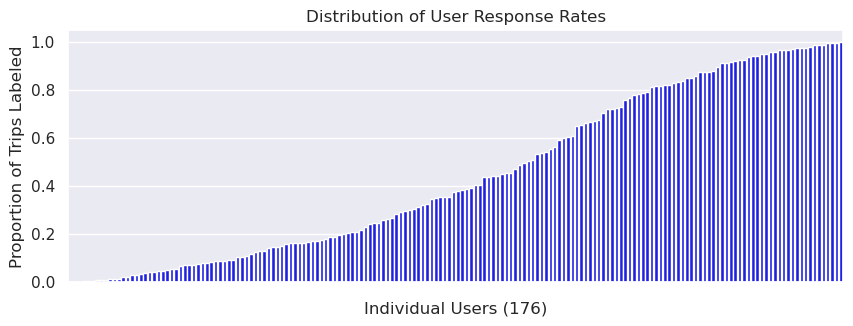

In [14]:
plot_data['proportion'] = plot_data['distance_y'] / plot_data['distance_x']
data_order = plot_data.sort_values('proportion', ascending=True).user_id_str
print(len(plot_data))

plot_title='Distribution of User Response Rates'
ylab='Proportion of Trips Labeled'
file_name='CanBikeCO_report_user_participation%s'
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='user_id_str', y='proportion', order=data_order, color='blue').set(title=plot_title,xlabel='Individual Users (176)',ylabel=ylab,xticklabels=[])
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpg", bbox_inches='tight')

## trying to plot labeling rate across time

In [49]:
#group the total data by day
all_data = (participant_ct_df.groupby(['start_local_dt_month', 'start_local_dt_year']).size() 
   .reset_index(name='count'))

all_data = all_data.sort_values(['start_local_dt_year', 'start_local_dt_month'])

all_data = all_data.astype({'start_local_dt_month': 'str'})
all_data = all_data.astype({'start_local_dt_year': 'str'})
all_data['Month'] = all_data[['start_local_dt_year', 'start_local_dt_month']].agg('-'.join, axis=1)


#group the labeled data by day#group the total data by day
labeled = (data.groupby(['start_local_dt_month', 'start_local_dt_year']).size() 
   .reset_index(name='count'))

labeled = labeled.sort_values(['start_local_dt_year', 'start_local_dt_month'])

labeled = labeled.astype({'start_local_dt_month': 'str'})
labeled = labeled.astype({'start_local_dt_year': 'str'})
labeled['Month'] = labeled[['start_local_dt_year', 'start_local_dt_month']].agg('-'.join, axis=1)


#merge them
plot_data = all_data.merge(labeled, how='left', on='Month').fillna(0)

#calc the proportion
plot_data['proportion'] = plot_data['count_y'] / plot_data['count_x']

#drop data before 6/2022 (when the full pilot started)
plot_data = plot_data.iloc[5:]
plot_data

,start_local_dt_month_x,start_local_dt_year_x,count_x,Month,start_local_dt_month_y,start_local_dt_year_y,count_y,proportion
5,6,2021,309,2021-6,6,2021,203,0.656958
6,7,2021,5143,2021-7,7,2021,3431,0.667120
7,8,2021,10016,2021-8,8,2021,5799,0.578974
8,9,2021,9626,2021-9,9,2021,4924,0.511531
9,10,2021,12781,2021-10,10,2021,6508,0.509193
10,11,2021,12319,2021-11,11,2021,5739,0.465866
11,12,2021,12976,2021-12,12,2021,5273,0.406366
12,1,2022,10427,2022-1,1,2022,4427,0.424571
13,2,2022,10234,2022-2,2,2022,4085,0.399160
14,3,2022,11849,2022-3,3,2022,4917,0.414972


In [ ]:
#graph it - line way -- but that's 'connect-the-dots' style (BAD)
plot_title = 'Labeling Rates Over Time'
ylab = 'Labeling Rate'
file_name = "CanBikeCO_report_ts_labels"
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=plot_data, x='Month', y='proportion', estimator=np.mean).set(title=plot_title, xlabel='Month', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

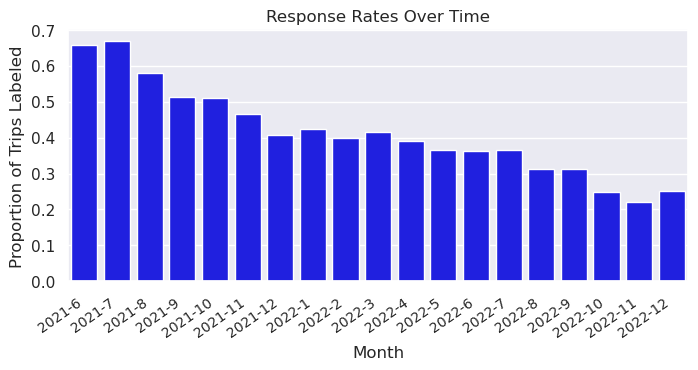

In [69]:
#graph it - bar way -- making no connect the dots claims :)

plot_title='Response Rates Over Time'
ylab='Proportion of Trips Labeled'
file_name='CanBikeCO_report_ts_labels'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=plot_data, x='Month', y='proportion', color='blue').set(title=plot_title,xlabel='Month',ylabel=ylab)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".jpeg", bbox_inches='tight')

# bar_data = plot_data[['Month', 'proportion']]

# ax = bar_data.plot.bar(title='Response Rates Over Time', 
#                         ylabel='Proportion of Trips Labeled',
#                         xlabel = 'Month')

# ax.set_xticklabels(plot_data.Month, rotation=45, ha='right')
# ax.get_legend().remove()

# plt.savefig("CanBikeCO_report_ts_labels.jpeg", bbox_inches='tight')

### Updates to the Pilot Study

In [ ]:
#remove stage users
data_non_stage = data[data.program != "stage"]
print(len(data_non_stage))

In [ ]:
#remove minipilot users
data_non_stage_non_mini = data_non_stage[data_non_stage.program != "prepilot"]
print(len(data_non_stage_non_mini))

In [ ]:
#separating programs
four_corners = data_non_stage_non_mini[data_non_stage_non_mini.program == "4c"]
community_cycles = data_non_stage_non_mini[data_non_stage_non_mini.program == "cc"]
fort_collins = data_non_stage_non_mini[data_non_stage_non_mini.program == "fc"]
pueblo = data_non_stage_non_mini[data_non_stage_non_mini.program == "pc"]
smart_commute = data_non_stage_non_mini[data_non_stage_non_mini.program == "sc"]
vail = data_non_stage_non_mini[data_non_stage_non_mini.program == "vail"]

In [ ]:
four_corners

In [ ]:
print(four_corners['user_id'].nunique())
print(community_cycles['user_id'].nunique())
print(fort_collins['user_id'].nunique())
print(pueblo['user_id'].nunique())
print(smart_commute['user_id'].nunique())
print(vail['user_id'].nunique())

In [ ]:
print(len(four_corners))
print(len(community_cycles))
print(len(fort_collins))
print(len(pueblo))
print(len(smart_commute))
print(len(vail))

# Filtering smart commute

In [ ]:
from datetime import datetime
smart_commute['start_ts']= pd.to_datetime(smart_commute['start_ts'], utc=True, unit='s')

In [ ]:
smart_commute['start_ts']

In [ ]:
trip_sep=smart_commute.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])

In [ ]:
print(trip_sep['user_id'].nunique())

In [ ]:
sc_unique=trip_sep['user_id'].unique()
print(*sc_unique)

In [ ]:
smart_commute.to_csv("smart_commute.csv")

In [ ]:
sc_ebike_first=trip_sep[trip_sep['Mode_confirm']=='E-bike']
sc_ebike_first

In [ ]:
sc_ebike_user_list= sc_ebike_first['user_id'].tolist()
smart_commute_incl_ebike = smart_commute[smart_commute['user_id'].isin(sc_ebike_user_list)]
print(smart_commute_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in sc_ebike_first['user_id']:
    for date in sc_ebike_first['start_ts']:
        smart_commute_ebike_first=smart_commute_incl_ebike[(smart_commute_incl_ebike['start_ts'] >= date)]

In [ ]:
smart_commute_ebike_first

In [ ]:
sc_unique_ebikefirst=smart_commute_ebike_first['user_id'].unique()
print(*sc_unique_ebikefirst)
print(smart_commute_ebike_first['user_id'].nunique())

# Filtering Four corners

In [ ]:
four_corners['start_ts']= pd.to_datetime(four_corners['start_ts'], utc=True, unit='s')

In [ ]:
trip_sep_fc=four_corners.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])
print(trip_sep_fc['user_id'].nunique())

In [ ]:
fc_ebike_first=trip_sep_fc[trip_sep_fc['Mode_confirm']=='E-bike']
fc_ebike_first

In [ ]:
fc_ebike_user_list= fc_ebike_first['user_id'].tolist()
four_corners_incl_ebike = four_corners[four_corners['user_id'].isin(fc_ebike_user_list)]
print(four_corners_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in fc_ebike_first['user_id']:
    for date in fc_ebike_first['start_ts']:
        four_corners_ebike_first=four_corners_incl_ebike[(four_corners_incl_ebike['start_ts'] >= date)]

In [ ]:
four_corners_ebike_first

In [ ]:
four_corners_ebike_first['Mode_confirm'].unique()

In [ ]:
fc_unique_ebikefirst=four_corners_ebike_first['user_id'].unique()
print(*fc_unique_ebikefirst)
print(four_corners_ebike_first['user_id'].nunique())

# Filtering community cycles

In [ ]:
community_cycles['start_ts']= pd.to_datetime(community_cycles['start_ts'], utc=True, unit='s')

In [ ]:
trip_sep_cc=community_cycles.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])
print(trip_sep_cc['user_id'].nunique())

In [ ]:
cc_ebike_first=trip_sep_cc[trip_sep_cc['Mode_confirm']=='E-bike']
cc_ebike_first

In [ ]:
cc_ebike_user_list= cc_ebike_first['user_id'].tolist()
community_cycles_incl_ebike = community_cycles[community_cycles['user_id'].isin(cc_ebike_user_list)]
print(community_cycles_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in cc_ebike_first['user_id']:
    for date in cc_ebike_first['start_ts']:
        community_cycles_ebike_first=community_cycles_incl_ebike[(community_cycles_incl_ebike['start_ts'] >= date)]

In [ ]:
community_cycles_ebike_first

In [ ]:
community_cycles_ebike_first['Mode_confirm'].unique()

In [ ]:
cc_unique_ebikefirst=community_cycles_ebike_first['user_id'].unique()
print(*cc_unique_ebikefirst)
print(community_cycles_ebike_first['user_id'].nunique())

# Filtering Fort Collins

In [ ]:
fort_collins['start_ts']= pd.to_datetime(fort_collins['start_ts'], utc=True, unit='s')

In [ ]:
trip_sep_fc=fort_collins.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])
print(trip_sep_fc['user_id'].nunique())

In [ ]:
fc_ebike_first=trip_sep_fc[trip_sep_fc['Mode_confirm']=='E-bike']
fc_ebike_first

In [ ]:
fc_ebike_user_list= fc_ebike_first['user_id'].tolist()
fort_collins_incl_ebike = fort_collins[fort_collins['user_id'].isin(fc_ebike_user_list)]
print(fort_collins_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in fc_ebike_first['user_id']:
    for date in fc_ebike_first['start_ts']:
        fort_collins_ebike_first=fort_collins_incl_ebike[(fort_collins_incl_ebike['start_ts'] >= date)]

In [ ]:
fort_collins_ebike_first

In [ ]:
fort_collins_ebike_first['Mode_confirm'].unique()

In [ ]:
fc_unique_ebikefirst=fort_collins_ebike_first['user_id'].unique()
print(*fc_unique_ebikefirst)
print(fort_collins_ebike_first['user_id'].nunique())

# Filtering pueblo

In [ ]:
pueblo['start_ts']= pd.to_datetime(pueblo['start_ts'], utc=True, unit='s')

In [ ]:
trip_sep_pu=pueblo.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])
print(trip_sep_pu['user_id'].nunique())

In [ ]:
pu_ebike_first=trip_sep_pu[trip_sep_pu['Mode_confirm']=='E-bike']
pu_ebike_first

In [ ]:
pu_ebike_user_list= pu_ebike_first['user_id'].tolist()
pueblo_incl_ebike = pueblo[pueblo['user_id'].isin(pu_ebike_user_list)]
print(pueblo_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in pu_ebike_first['user_id']:
    for date in pu_ebike_first['start_ts']:
        pueblo_ebike_first=pueblo_incl_ebike[(pueblo_incl_ebike['start_ts'] >= date)]

In [ ]:
pueblo_ebike_first

In [ ]:
pueblo_ebike_first['Mode_confirm'].unique()

In [ ]:
pu_unique_ebikefirst=pueblo_ebike_first['user_id'].unique()
print(*pu_unique_ebikefirst)
print(pueblo_ebike_first['user_id'].nunique())

# Filtering Vail

In [ ]:
vail['start_ts']= pd.to_datetime(vail['start_ts'], utc=True, unit='s')

In [ ]:
trip_sep_va=vail.groupby(['user_id','Mode_confirm']).apply(lambda x:x[x.start_ts==min(x.start_ts)])
print(trip_sep_va['user_id'].nunique())

In [ ]:
va_ebike_first=trip_sep_va[trip_sep_va['Mode_confirm']=='E-bike']
va_ebike_first

In [ ]:
va_ebike_user_list= va_ebike_first['user_id'].tolist()
vail_incl_ebike = vail[vail['user_id'].isin(va_ebike_user_list)]
print(vail_incl_ebike['user_id'].nunique())

In [ ]:
for unique_id in va_ebike_first['user_id']:
    for date in va_ebike_first['start_ts']:
        vail_ebike_first=vail_incl_ebike[(vail_incl_ebike['start_ts'] >= date)]

In [ ]:
vail_ebike_first

In [ ]:
vail_ebike_first['Mode_confirm'].unique()

In [ ]:
va_unique_ebikefirst=vail_ebike_first['user_id'].unique()
print(*va_unique_ebikefirst)
print(vail_ebike_first['user_id'].nunique())

# Combining the filtered datasets

In [ ]:
#Combining the filtered datasets
print(four_corners_ebike_first['user_id'].nunique())
print(community_cycles_ebike_first['user_id'].nunique())
print(fort_collins_ebike_first['user_id'].nunique())
print(pueblo_ebike_first['user_id'].nunique())
print(smart_commute_ebike_first['user_id'].nunique())
print(vail_ebike_first['user_id'].nunique())

print(len(four_corners_ebike_first))
print(len(community_cycles_ebike_first))
print(len(fort_collins_ebike_first))
print(len(pueblo_ebike_first))
print(len(smart_commute_ebike_first))
print(len(vail_ebike_first))

In [ ]:
filtered_merged = pd.concat([four_corners_ebike_first, community_cycles_ebike_first, fort_collins_ebike_first, 
                             pueblo_ebike_first, smart_commute_ebike_first,vail_ebike_first], axis=0)
print(len(filtered_merged))
print(filtered_merged['user_id'].nunique())

In [ ]:
filtered_merged.to_csv("filtered_merged_trips.csv")

# Analysis

In [40]:
#data=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\expanded_ct.csv")
data=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips_2.csv")

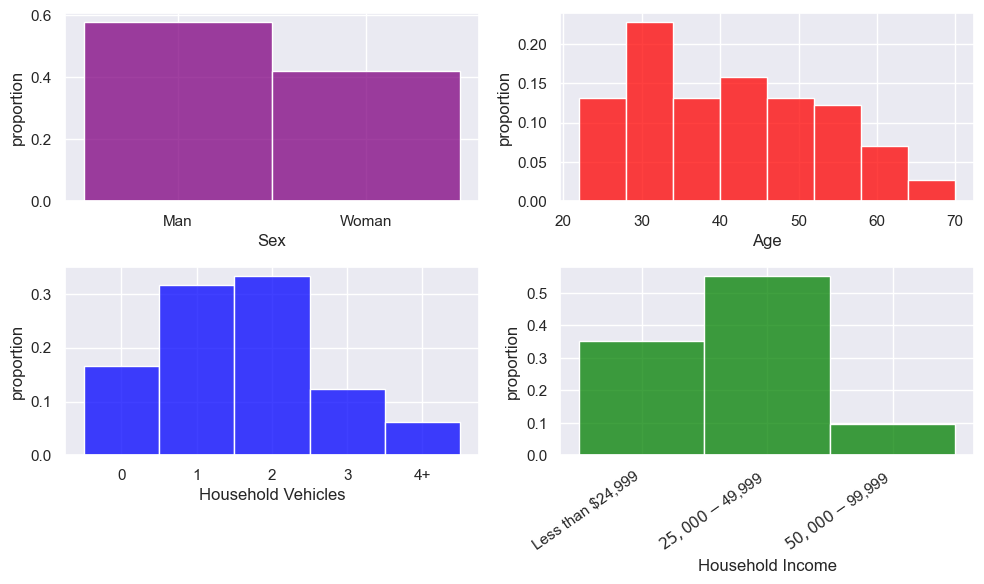

In [16]:
# Age, Income, Gender
plot_data = data.copy()
plot_data = plot_data.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data = plot_data[plot_data['GENDER'].isin(['Man','Woman'])]
plot_data = plot_data.groupby(['user_id'], as_index=False).nth(0)

plot_title='Participant Demographics'
ylab='Count'
file_name='CanBikeCO_report_demog%s'%file_suffix

fig, axs = plt.subplots(2,2,figsize=(10,6))
sns.histplot(data=plot_data, x='GENDER', ax=axs[0,0], color='purple', stat='probability').set(xlabel='Sex',ylabel='proportion')
sns.histplot(data=plot_data, x='AGE', ax=axs[0,1], color='red', stat='probability').set(xlabel='Age',ylabel='proportion')
sns.histplot(data=plot_data, x='VEH', ax=axs[1,0], color='blue', stat='probability').set(xlabel='Household Vehicles',ylabel='proportion')
sns.histplot(data=pd.DataFrame(plot_data['HHINC'].dropna()), x='HHINC', ax=axs[1,1], color='green', stat='probability').set(xlabel='Household Income',ylabel='proportion')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()

fig.savefig(file_name+".png", bbox_inches='tight')

In [ ]:
plot_data=plot_data.reset_index()

In [ ]:
plot_data.columns

In [17]:
sns.set_palette('tab20', 9)

In [35]:
minipilot_mode_labels = ['Car',
                   'Shared Car',
                   'Walk',
                   'Transit',
                   'Ridehail',
                   'Other',
                   'E-bike']
minipilot_all_data = [.293,
                     .209,
                     .075,
                     .054,
                     .029,
                     .029,
                     .313]
minipilot_commute_data = [.270,
                         .294,
                         .050,
                         .0,
                         .0,
                         .062,
                         .324]
colnames = ['Mode_confirm','All Trips','Commute Trips']
minipilot_mode_data_1 = pd.DataFrame(list(zip(minipilot_mode_labels, minipilot_all_data)))
minipilot_mode_data_2 = pd.DataFrame(list(zip(minipilot_mode_labels, minipilot_commute_data)))
minipilot_mode_data_1['Trip Type'] = 'All Trips'
minipilot_mode_data_2['Trip Type'] = 'Work Trips'
minipilot_mode_data = pd.concat([minipilot_mode_data_1, minipilot_mode_data_2])
minipilot_mode_data['Dataset'] = 'Minipilot'
minipilot_mode_data.columns = ['Mode','Proportion','Trip Type','Dataset']

minipilot_purp_labels = ['Home',
                   'Work',
                   'Pick-up/Drop off',
                   'Shopping',
                   'Recreation/Exercise',
                   'Meal',
                   'Entertainment/Social',
                   'Transit transfer',
                   'Other',
                   'Personal/Medical']
minipilot_all_data = [.171,
                     .163,
                     .138,
                     .120,
                     .058,
                     .055,
                     .045,
                     .022,
                     .051,
                     .176]
minipilot_commute_data = [.162,
                         .166,
                         .190,
                         .097,
                         .086,
                         .082,
                         .061,
                          0,
                         .052,
                         .104]
colnames = ['Trip_purpose','All Trips','E-Bike Trips']
minipilot_purp_data_1 = pd.DataFrame(list(zip(minipilot_purp_labels, minipilot_all_data)))
minipilot_purp_data_2 = pd.DataFrame(list(zip(minipilot_purp_labels, minipilot_commute_data)))
minipilot_purp_data_1['Trip Type'] = 'All Trips'
minipilot_purp_data_2['Trip Type'] = 'E-Bike Trips'
minipilot_purp_data = pd.concat([minipilot_purp_data_1, minipilot_purp_data_2])
minipilot_purp_data['Dataset'] = 'Minipilot'
minipilot_purp_data.columns = ['Purpose','Proportion','Trip Type','Dataset']

In [51]:
plot_data = data.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'Work Trips'

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Mode','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_mode_data])

In [ ]:
plot_data = data.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'Work Trips'
t2.loc[len(t2.index)] = ['Ridehail', 'Work Trips', 0]
#t2.loc[len(t2.index)] = ['Transit', 'Work Trips', 0] 

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Vail'
plot_data.columns = ['Mode','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_mode_data])

In [ ]:
t2

In [52]:
plot_data

,Mode,Trip Type,Proportion,Dataset
0,Car,All Trips,0.256326,Long Term
1,E-bike,All Trips,0.282100,Long Term
2,Other,All Trips,0.034588,Long Term
3,Ridehail,All Trips,0.005269,Long Term
4,Shared Car,All Trips,0.238715,Long Term
5,Transit,All Trips,0.022701,Long Term
6,Walk,All Trips,0.160303,Long Term
0,Car,Work Trips,0.282939,Long Term
1,E-bike,Work Trips,0.448652,Long Term
2,Other,Work Trips,0.025523,Long Term


NameError: name 'file_suffix' is not defined

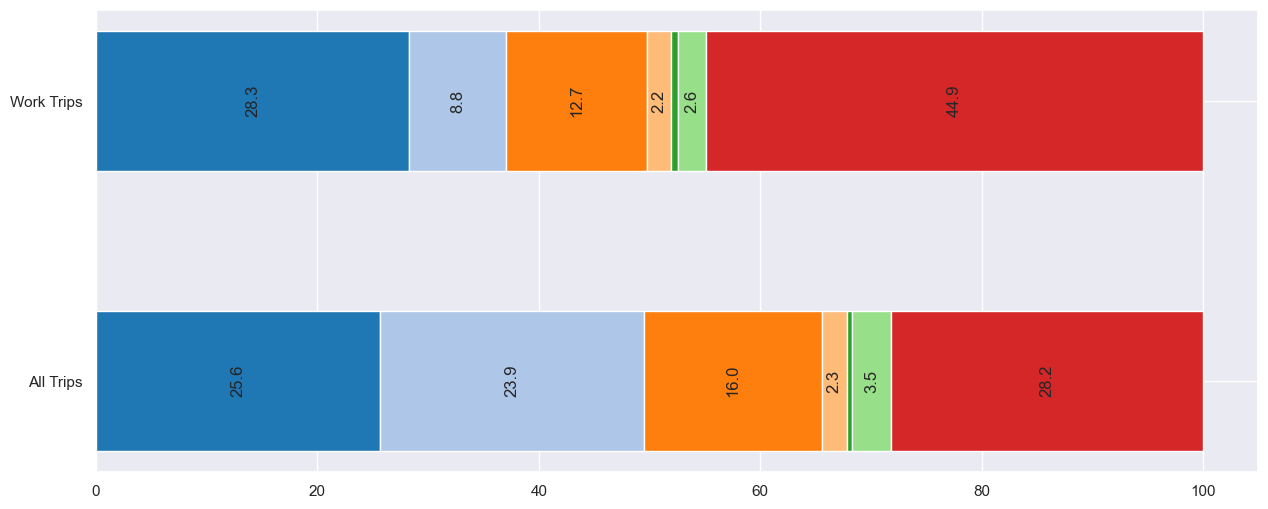

In [53]:
width = 0.5
fig, ax = plt.subplots(1,1, figsize=(15,6))
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]

    #labels = mini['Trip Type']
    #vals = mini['Proportion']*100
    #vals_str = [round(v,1) if v>1 else '' for v in vals]
    #bar = ax.barh(labels, vals, width, left=running_total_mini, label=mode)
    #ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    #running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    #running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax.barh(labels, vals, width, left=running_total_long, label=mode)
    ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

file_name='CanBikeCO_report_mode_share%s'%
ax.set_title('Minipilot')
ax.set_title('Mode Share')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.25)
fig.tight_layout()
plt.show()
fig.savefig(file_name+".png", bbox_inches='tight')

In [30]:
sns.set_palette('tab20', 12)

In [41]:
plot_data = data.copy()
plot_data.loc[plot_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
plot_data.loc[plot_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'
t1 = plot_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'E-Bike Trips'

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long_Term'
plot_data.columns = ['Purpose','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_purp_data])

In [42]:
plot_data

,Purpose,Trip Type,Proportion,Dataset
0,Entertainment/Social,All Trips,0.066736,Long_Term
1,Home,All Trips,0.215234,Long_Term
2,Meal,All Trips,0.057337,Long_Term
3,Other,All Trips,0.223722,Long_Term
4,Personal/Medical,All Trips,0.030002,Long_Term
5,Recreation/Exercise,All Trips,0.086103,Long_Term
6,Shopping,All Trips,0.097388,Long_Term
7,Transit transfer,All Trips,0.007496,Long_Term
8,Work,All Trips,0.215982,Long_Term
0,Entertainment/Social,E-Bike Trips,0.052398,Long_Term


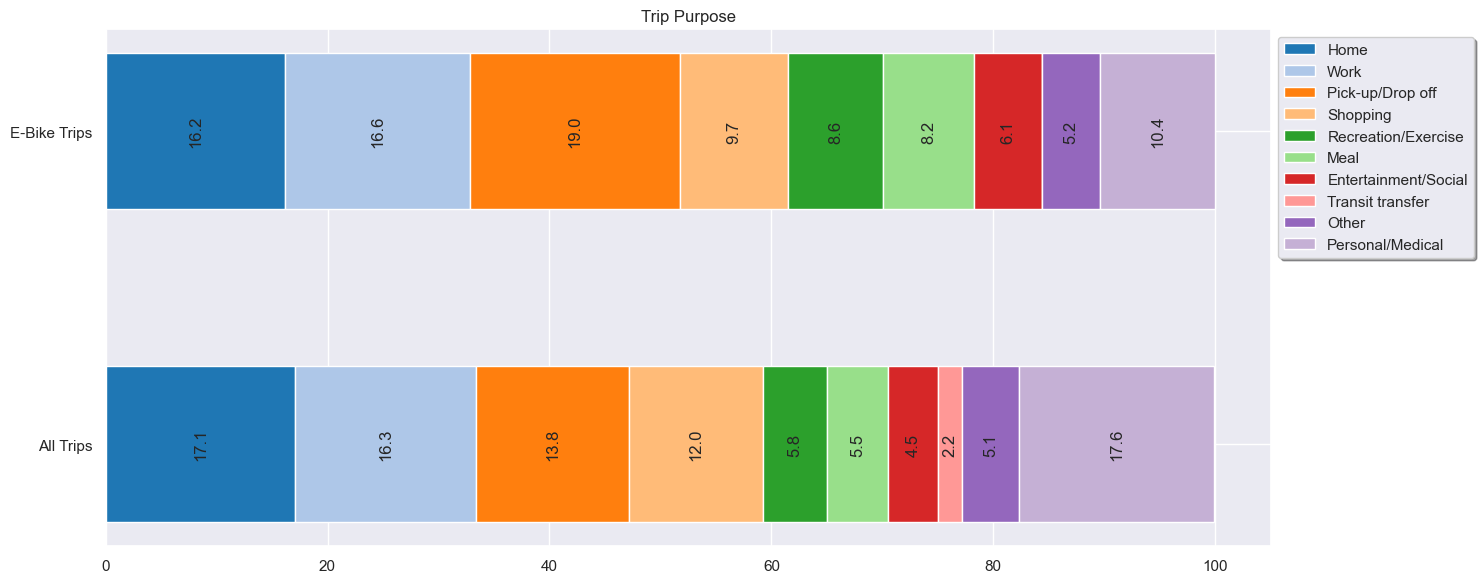

In [50]:
width = 0.5
fig, ax = plt.subplots(1,1, figsize=(15,6))
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Minipilot']

for purp in pd.unique(fig_data_mini.Purpose):
    mini = fig_data_mini[fig_data_mini['Purpose']==purp]
    long = fig_data_long[fig_data_long['Purpose']==purp]
    
    #labels = mini['Trip Type']
    #vals = mini['Proportion']*100
    #vals_str = [round(v,1) if v>1 else '' for v in vals]
    #bar = ax.barh(labels, vals, width, left=running_total_mini, label=purp)
    #ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    #running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    #running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax.barh(labels, vals, width, left=running_total_long, label=purp)
    ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

file_name='CanBikeCO_report_purp_share%s'
ax.set_title('Minipilot')
ax.set_title('Trip Purpose')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.25)
fig.tight_layout()
plt.show()
fig.savefig(file_name+".png", bbox_inches='tight')

In [33]:
# Gas car
5170 * 1 / 1000000 * 157.2 * 453 * .62

# Ebike
.022 * 1 / 1000 * 1166 * 453 * .62

7.204620719999999

In [36]:
for i in range(0,len(df_ei)):
    if df_ei.iloc[i,:]['fuel']=='electric':
        z = df_ei.iloc[i,:]['energy_intensity_factor'] * df_ei.iloc[i,:]['CO2_factor'] * .001
        print(df_ei.iloc[i,:]['mode'])
        print(f"{z} lb C02/pass-mi")
    elif df_ei.iloc[i,:]['fuel']=='gasoline':
        z = df_ei.iloc[i,:]['energy_intensity_factor'] * df_ei.iloc[i,:]['CO2_factor'] * .000001
        print(df_ei.iloc[i,:]['mode'])
        print(f"{z} lb C02/pass-mi")
df_ei['energy_intensity_factor'] * df_ei['CO2_factor']

Gas Car, drove alone
0.8127239999999999 lb C02/pass-mi
Gas Car, with others
0.40636199999999995 lb C02/pass-mi
E-car, drove alone
0.2915 lb C02/pass-mi
E-car, with others
0.14575 lb C02/pass-mi
Taxi/Uber/Lyft
1.1340407999999997 lb C02/pass-mi
Train
0.43142 lb C02/pass-mi
Scooter share
0.031482 lb C02/pass-mi
E-bike
0.025652 lb C02/pass-mi
E-bike
0.025652 lb C02/pass-mi


0      812724.000
1      406362.000
2         291.500
3         145.750
4     1134040.800
5      735528.000
6      735528.000
7         431.420
8          31.482
9          25.652
10          0.000
11          0.000
12          0.000
13          0.000
14          0.000
15          0.000
16         25.652
dtype: float64

In [37]:
# Emissions
plot_data = data_eb.copy()
co2rp = plot_data.groupby('Replaced_mode').agg({'CO2_Impact(lb)': ['sum','mean']},)
co2rp.columns = ['total_lb_CO2_emissions', 'average_lb_CO2_emission']
co2rp = co2rp.reset_index()
co2rp= co2rp.sort_values(by=['total_lb_CO2_emissions'], ascending=False)
co2rp['boolean'] = co2rp['total_lb_CO2_emissions'] > 0

net_CO2_saved = round(sum(co2rp['total_lb_CO2_emissions']), 2)

x = co2rp['total_lb_CO2_emissions']
y = co2rp['Replaced_mode']
color =co2rp['boolean']

plot_title="Sketch of CO2 Emissions Impact for all confirmed trips \n Contribution by mode towards a total of %s (kWH) \n%s" % (net_CO2_saved, quality_text)
file_name ='CanBikeCO_report_sketch_all_mode_CO2impact%s' % file_suffix
CO2_impact(x,y,color,plot_title,file_name)

file_name='CanBikeCO_report_purp_share%s'%file_suffix
fig.tight_layout()
plt.show()
fig.savefig(SAVE_DIR+file_name+".png", bbox_inches='tight')

KeyError: "Column 'CO2_Impact(lb)' does not exist!"

### Who Rides E-Bikes, and Why?

In [38]:
sns.set_palette('Set1', 9)

In [ ]:
print(four_corners['user_id'].nunique())
print(community_cycles['user_id'].nunique())
print(fort_collins['user_id'].nunique())
print(pueblo['user_id'].nunique())
print(smart_commute['user_id'].nunique())
print(vail['user_id'].nunique())

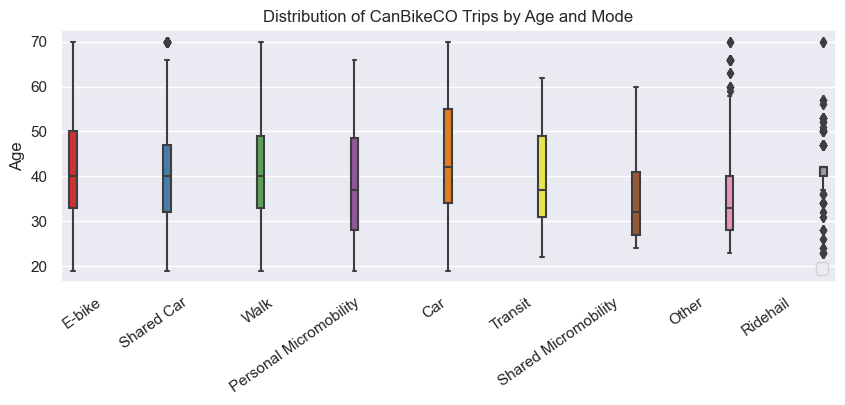

In [39]:
# Distribution of mode by age
plot_data = data.copy()

plot_title = 'Distribution of CanBikeCO Trips by Age and Mode'
ylab = 'Age'
file_name = "CanBikeCO_report_age%s"%file_suffix

fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(ax=ax, data=plot_data, x='Mode_confirm', y='AGE', hue='Mode_confirm').set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])
ax.figure.savefig(file_name+".png", bbox_inches='tight')

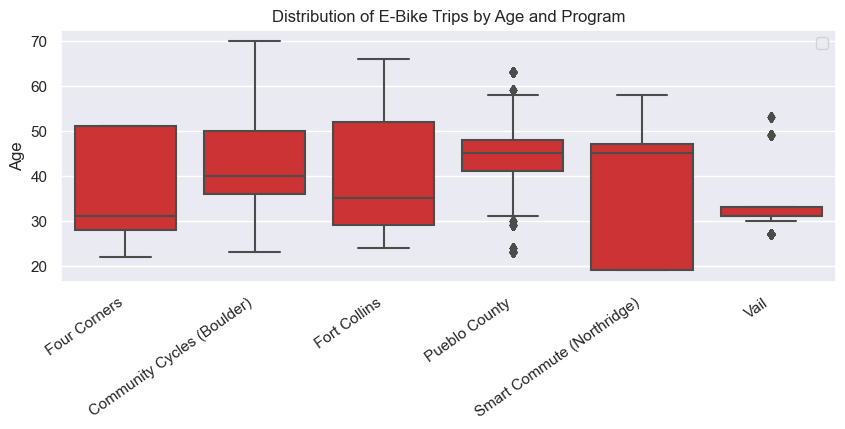

In [40]:
# Distribution of mode by age
plot_data = data.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

plot_title = 'Distribution of E-Bike Trips by Age and Program'
ylab = 'Age'
file_name = "CanBikeCO_report_age%s"%file_suffix

fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(ax=ax, data=plot_data, x='Program', y='AGE', hue='Mode_confirm').set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])
ax.figure.savefig(file_name+".png", bbox_inches='tight')

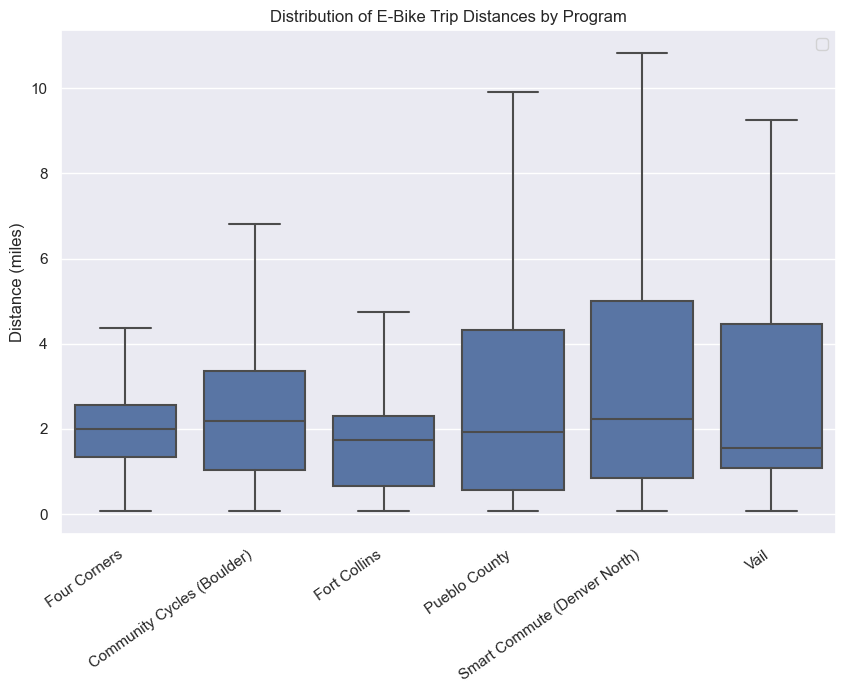

In [218]:
# Distribution of distances by program
plot_data = data_2.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

plot_title = 'Distribution of E-Bike Trip Distances by Program'
ylab = 'Distance (miles)'

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax=ax, data=plot_data, x='Program', y='distance_miles', hue='Mode_confirm', showfliers=False).set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])

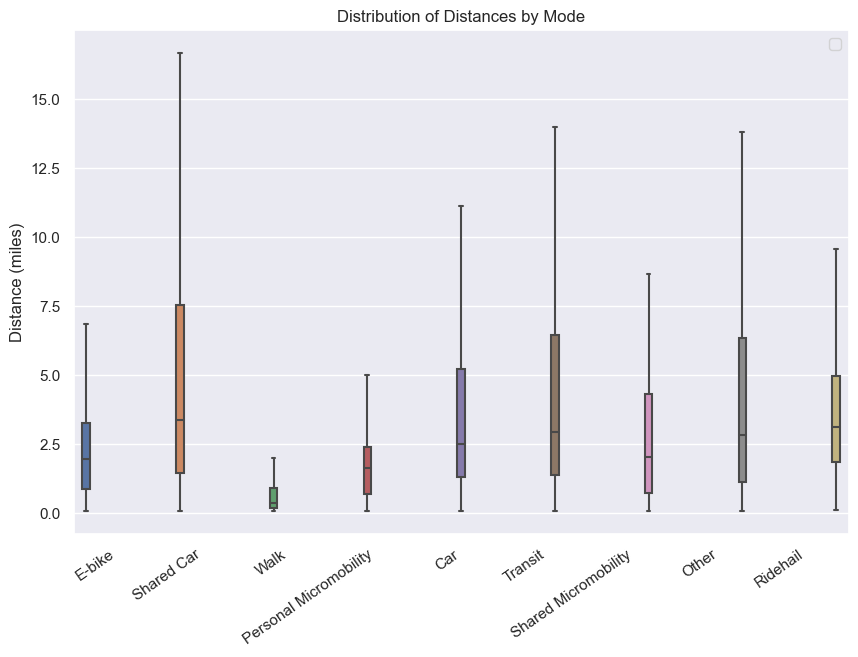

In [216]:
# Distribution of distances by program
plot_data = data_2.copy()
#plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
#plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

plot_title = 'Distribution of Distances by Mode'
ylab = 'Distance (miles)'

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax=ax, data=plot_data, x='Mode_confirm', y='distance_miles', hue='Mode_confirm', showfliers=False).set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])

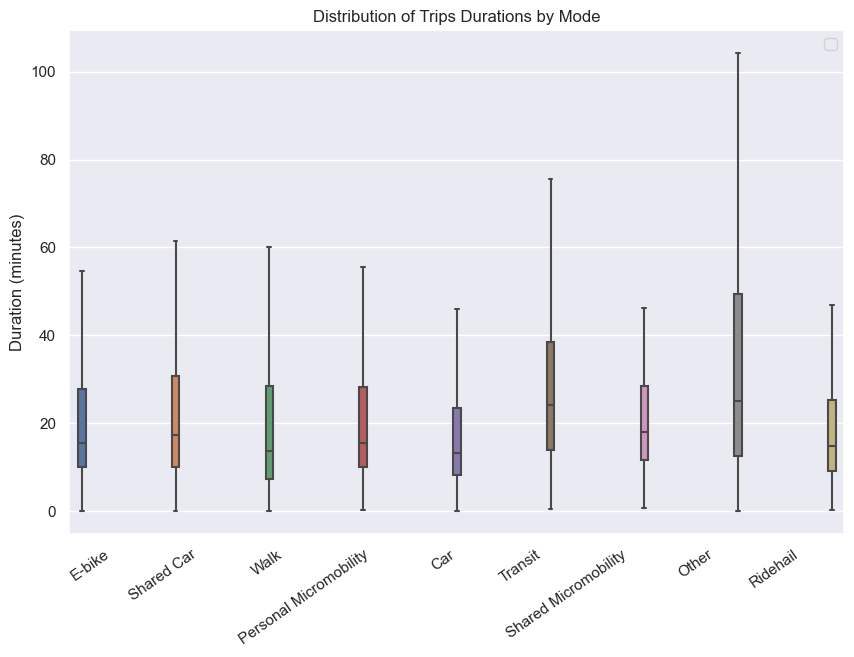

In [217]:
# Distribution of distances by program
plot_data = data_2.copy()
#plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
#plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

plot_title = 'Distribution of Trips Durations by Mode'
ylab = 'Duration (minutes)'

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax=ax, data=plot_data, x='Mode_confirm', y='duration', hue='Mode_confirm', showfliers=False).set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])

In [41]:
sns.set_palette('Set2', 6)

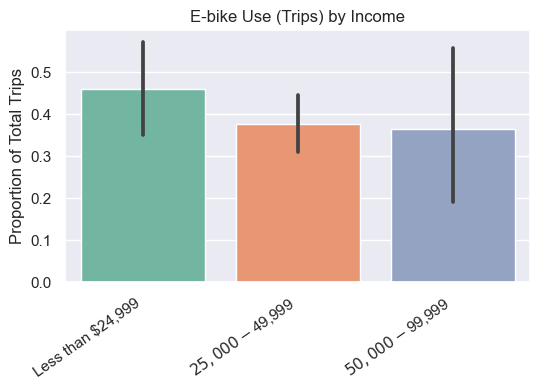

In [42]:
# Proportion of trips that are ebike by income group
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['HHINC','user_id'], as_index=False).nth(0)[['HHINC','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

file_name = 'CanBikeCO_report_income_trip%s'%file_suffix
ylab='Proportion of Total Trips'
plot_title = 'E-bike Use (Trips) by Income'
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=plot_data, x='HHINC', y='proportion', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

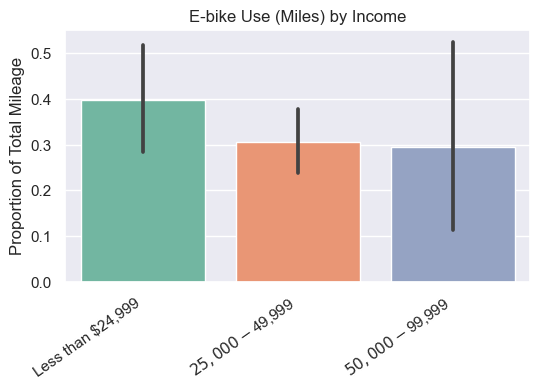

In [43]:
# Proportion of trips that are ebike by income group
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).sum()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).sum()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['HHINC','user_id'], as_index=False).nth(0)[['HHINC','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

file_name = 'CanBikeCO_report_income_mileage%s'%file_suffix
ylab='Proportion of Total Mileage'
plot_title = 'E-bike Use (Miles) by Income'
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=plot_data, x='HHINC', y='proportion', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [44]:
sns.set_palette('Paired', 5)

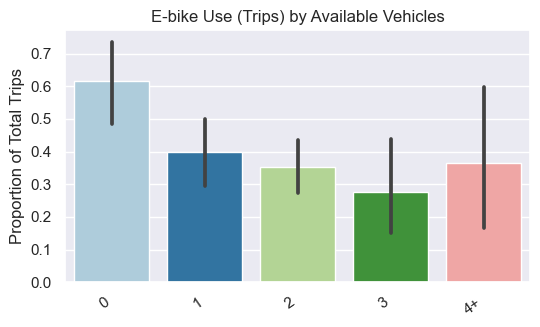

In [45]:
# Proportion of trips that are ebike by income group
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['VEH','user_id'], as_index=False).nth(0)[['VEH','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

file_name = 'CanBikeCO_report_veh_trip%s'%file_suffix
plot_title = 'E-bike Use (Trips) by Available Vehicles'
ylab='Proportion of Total Trips'
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=plot_data, x='VEH', y='proportion', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

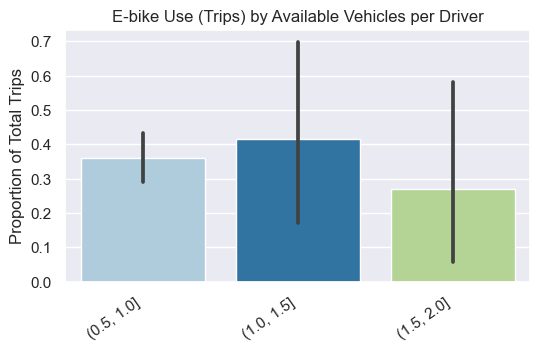

In [49]:
# Proportion of trips that are ebike by income group
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['VEH','user_id'], as_index=False).nth(0)[['veh_per_driver','user_id']]
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')
#plot_data['veh_per_driver'] = pd.cut(plot_data['veh_per_driver'], bins=[.25,.5,.75,1,1.25,1.5,1.75,2])
plot_data['veh_per_driver'] = pd.cut(plot_data['veh_per_driver'], bins=[.5,1,1.5,2])

file_name = 'CanBikeCO_report_vehpdriver_trip%s'%file_suffix
plot_title = 'E-bike Use (Trips) by Available Vehicles per Driver'
ylab='Proportion of Total Trips'
fig, ax = plt.subplots(figsize=(6,4))
# sns.boxplot(ax=ax, data=plot_data, x='veh_per_driver', y='proportion').set(title=plot_title, xlabel='', ylabel=ylab)
sns.barplot(data=plot_data, x='veh_per_driver', y='proportion', estimator=np.mean).set(title=plot_title,xlabel='',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [50]:
sns.set_palette('Set1', 3)

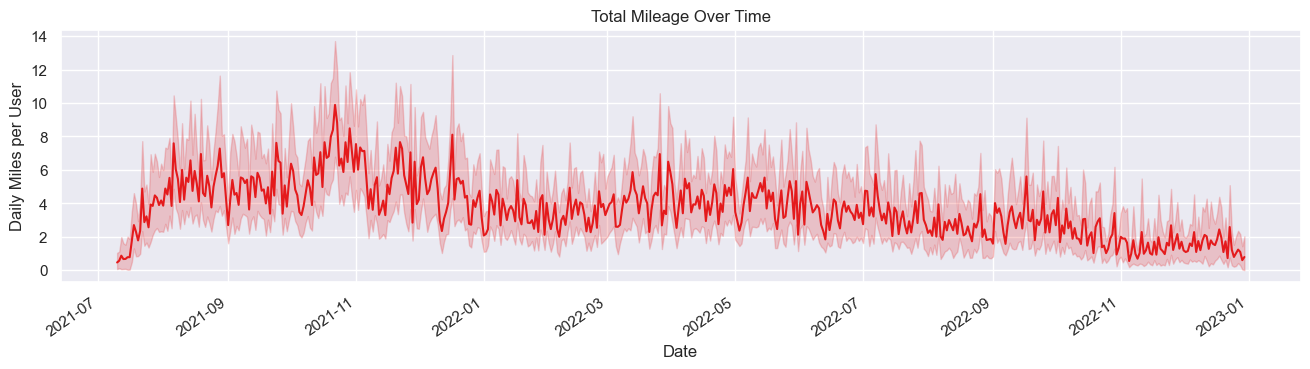

In [51]:
# How total mileage changes over time
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','date_time'], as_index=False).sum()[['user_id','date_time','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
plot_data = t1

plot_title = 'Total Mileage Over Time'
ylab = 'Daily Miles per User'
file_name = "CanBikeCO_report_ts_miles%s"%file_suffix
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=plot_data, x='date_time', y='distance_miles', estimator=np.mean).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

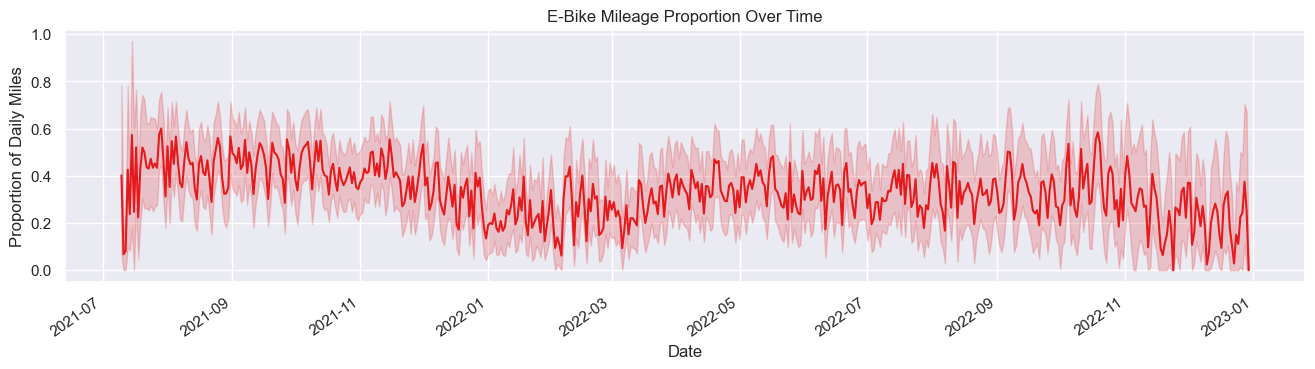

In [52]:
# How ebike mileage changes over time
plot_data = data.copy()

t1 = plot_data.groupby(['user_id','date_time','Mode_confirm'], as_index=False).sum()[['user_id','date_time','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id','date_time'], as_index=False).sum()[['user_id','date_time','distance_miles']]
plot_data = t1.merge(t2, on=['user_id','date_time'])
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data[plot_data['distance_miles_y'].notnull()]

plot_title = 'E-Bike Mileage Proportion Over Time'
ylab = 'Proportion of Daily Miles'
file_name = "CanBikeCO_report_ts_mileage_proportion%s"%file_suffix
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=plot_data, x='date_time', y='proportion', estimator=np.mean).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [53]:
sns.set_palette('Set1', 9)

C:\Users\dakcicek\Anaconda3\envs\emission\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



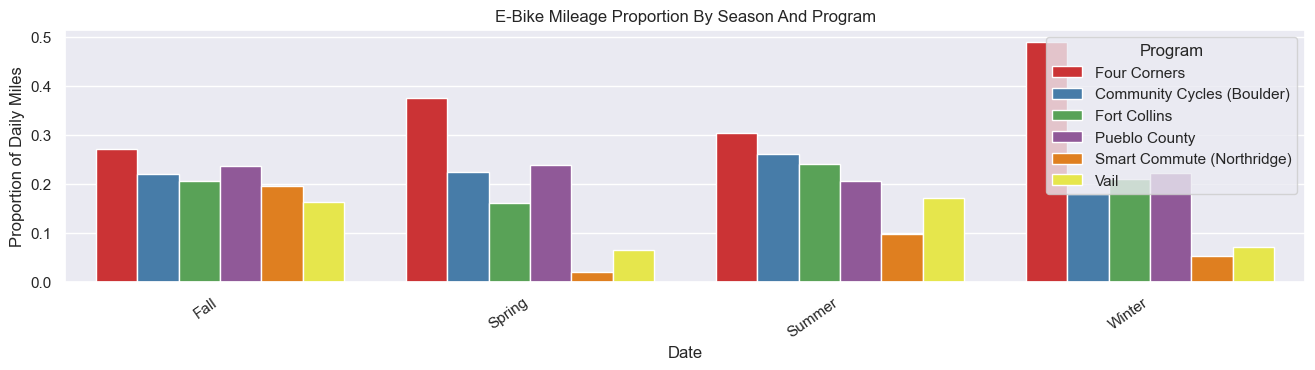

In [54]:
# How ebike mileage changes over time by program
plot_data = data.copy()

plot_data['month'] = plot_data.date_time.dt.month
plot_data['month'] = plot_data['month'].replace([6,7,8,9,10,11,12,1,2,3,4,5], ['Summer','Summer','Summer','Fall','Fall','Fall','Winter','Winter','Winter','Spring','Spring','Spring'])
t1 = plot_data.groupby(['program','month','Mode_confirm'], as_index=False).sum()[['program','month','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['program','month'], as_index=False).sum()[['program','month','distance_miles']]
plot_data = t1.merge(t2, on=['program','month'])
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

plot_title = 'E-Bike Mileage Proportion By Season And Program'
ylab = 'Proportion of Daily Miles'
file_name = "CanBikeCO_report_ts_mileage_season%s"%file_suffix
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(data=plot_data, x='month', y='proportion', hue='Program', estimator=np.mean, ci=None).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [55]:
sns.set_palette('Set1', 9)

FileNotFoundError: [Errno 2] No such file or directory: '/plots/CanBikeCO_report_mode_share_distance_short_all.png'

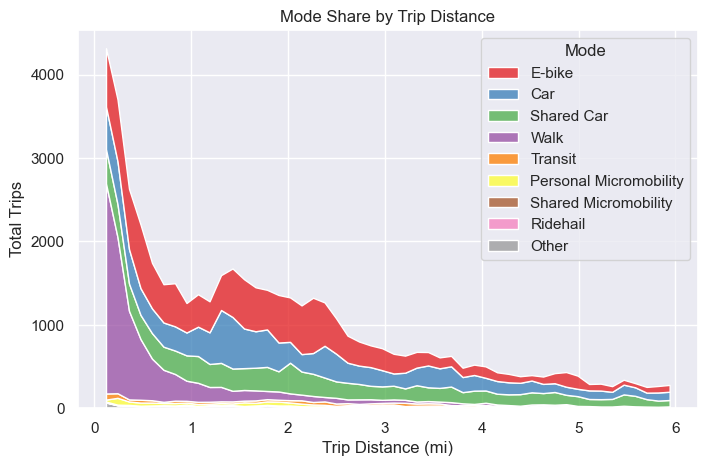

In [56]:
# Distance and mode chosen relationship
plot_data = data.copy()
plot_data = plot_data[plot_data['distance_miles']<6]

plot_title = 'Mode Share by Trip Distance'
ylab = 'Total Trips'
file_name = "CanBikeCO_report_mode_share_distance_short%s"%file_suffix
proportion_hist_plot(plot_data, 'distance_miles', plot_title, ylab, file_name)

FileNotFoundError: [Errno 2] No such file or directory: '/plots/CanBikeCO_report_mode_share_distance_long_all.png'

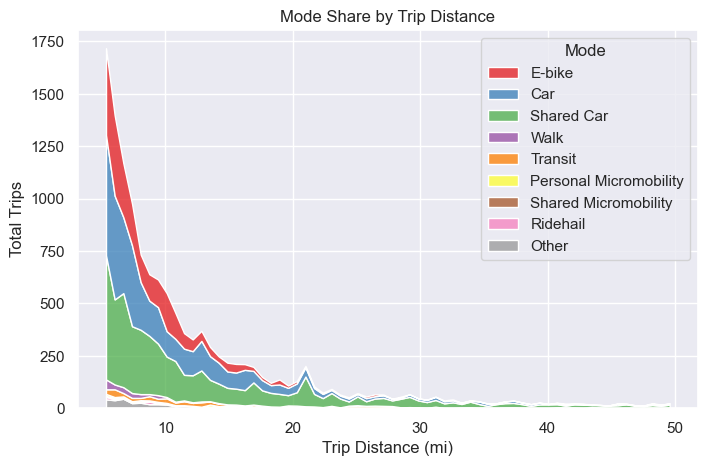

In [57]:
# Distance and mode chosen relationship
plot_data = data.copy()
plot_data = plot_data[plot_data['distance_miles']>5]

plot_title = 'Mode Share by Trip Distance'
ylab = 'Total Trips'
file_name = "CanBikeCO_report_mode_share_distance_long%s"%file_suffix
proportion_hist_plot(plot_data, 'distance_miles', plot_title, ylab, file_name)

### What Does an E-Bike Replace

In [58]:
sns.set_palette('Dark2', 10)

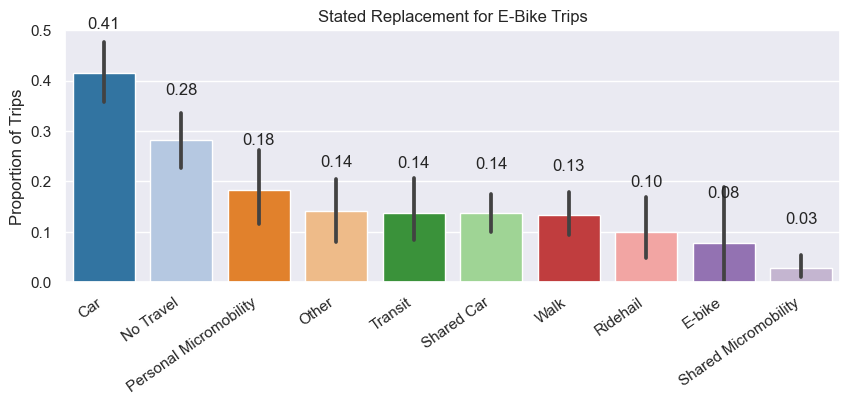

In [84]:
# Substitution rate of ebike trips
plot_data = data.copy()
t1 = plot_data.groupby(['user_id','Replaced_mode'], as_index=False).count()[['user_id','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Stated Replacement for E-Bike Trips'
ylab='Proportion of Trips'
file_name='CanBikeCO_report_replacement%s'%file_suffix
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,.5))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=30)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

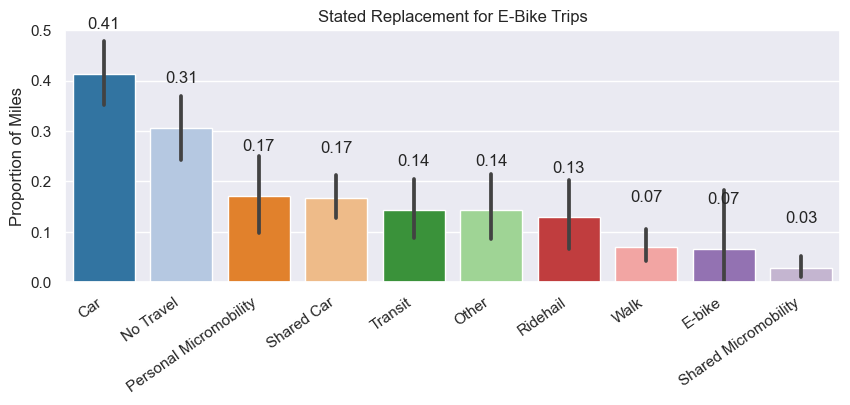

In [81]:
# Substitution rate of ebike trips
plot_data = data.copy()
t1 = plot_data.groupby(['user_id','Replaced_mode'], as_index=False).sum()[['user_id','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).sum()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Stated Replacement for E-Bike Trips'
ylab='Proportion of Miles'
file_name='CanBikeCO_report_replacement_miles%s'%file_suffix
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,.5))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=30)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [85]:
t1

,user_id,Replaced_mode,distance_miles
0,0154d714-3928-4c34-b865-e5a417cd48af,Car,179
1,0154d714-3928-4c34-b865-e5a417cd48af,Shared Car,95
2,03a395b4-d861-4757-bb84-32b4984559b0,Car,237
3,03a395b4-d861-4757-bb84-32b4984559b0,No Travel,1
4,03a395b4-d861-4757-bb84-32b4984559b0,Other,2
...,...,...,...
603,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Personal Micromobility,2
604,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Ridehail,5
605,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Shared Car,6
606,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Transit,1


In [86]:
plot_data

,user_id,Replaced_mode,distance_miles_x,distance_miles_y,proportion
0,0154d714-3928-4c34-b865-e5a417cd48af,Car,179,274,0.653285
1,0154d714-3928-4c34-b865-e5a417cd48af,Shared Car,95,274,0.346715
2,03a395b4-d861-4757-bb84-32b4984559b0,Car,237,244,0.971311
3,03a395b4-d861-4757-bb84-32b4984559b0,No Travel,1,244,0.004098
4,03a395b4-d861-4757-bb84-32b4984559b0,Other,2,244,0.008197
...,...,...,...,...,...
603,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Personal Micromobility,2,116,0.017241
604,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Ridehail,5,116,0.043103
605,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Shared Car,6,116,0.051724
606,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Transit,1,116,0.008621


In [ ]:
# Emissions analysis
z = data_eb.groupby('Replaced_mode', as_index=False).sum('distance')[['Replaced_mode','distance']]

co2_combo_factors = [5170*157.2*.000001,
                    .022*1166*.001,
                    0,
                    0,
                    0,
                    7214*157.2*.000001,
                    2585*157.2*.000001,
                    .027*1166*.001,
                    4560*161.3*.000001,
                    0]
co2_ebike_factor = .022*1166*.001
z['co2_impact_factor'] = [x-co2_ebike_factor for x in co2_combo_factors]
z['lb_co2'] = z['distance']*z['co2_impact_factor'] # Reduction=positive
metric_ton_co2_reduction = sum(z['lb_co2'])/2204
unique_users = len(pd.unique(data_eb['user_id']))
print(f"Net reduction: {metric_ton_co2_reduction} metric tons over {unique_users} users.")
print(f"Net program costs: {2400*unique_users}")
print(f"Program $/mtCO2: {(2400*unique_users) / (metric_ton_co2_reduction)}")

In [ ]:
# Income analysis
mean_hhinc = np.mean(data.groupby('user_id', as_index=False).min('HHINC_NUM')[['user_id','HHINC_NUM']].HHINC_NUM.dropna())
mean_hourly_wage = mean_hhinc / 52 / 40
9.70 / 16

In [ ]:
data.columns

In [ ]:
# Demographic and trip summary table
print(data.drop_duplicates(['user_id'])[['user_id','AGE','HHINC_NUM','VEH_num']].agg(['mean','std','min','max']))
data['distance_mi'] = data['distance'] / 1609
print(data[['user_id','distance_mi','duration']].agg(['mean','std','min','max']))

In [ ]:
# Demographic and trip summary table
print(data.drop_duplicates('user_id')['HHINC'].value_counts())
print(data.drop_duplicates('user_id')['GENDER'].value_counts())
print(pd.cut(data.drop_duplicates('user_id')['AGE'], bins=[0,18,24,40,65,75]).value_counts())
print(pd.cut(data['duration'], bins=[0,15,30,60,90,120,9999]).value_counts())
print(data['Mode_confirm'].value_counts())
print(data.drop_duplicates('user_id')['STUDENT'].value_counts())
print(data.drop_duplicates('user_id')['What is the highest grade or degree that you have completed?'].value_counts())

In [ ]:
# Demographic and trip summary table
n_persons = len(data.drop_duplicates('user_id'))
n_trips = len(data)

print(data.drop_duplicates('user_id')['HHINC'].value_counts() / n_persons)
print(data.drop_duplicates('user_id')['GENDER'].value_counts() / n_persons)
print(pd.cut(data.drop_duplicates('user_id')['AGE'], bins=[0,18,24,40,65,75]).value_counts() / n_persons)
print(pd.cut(data['duration'], bins=[0,15,30,60,90,120,9999]).value_counts() / n_trips)
print(data['Mode_confirm'].value_counts() / n_trips)
print(data.drop_duplicates('user_id')['STUDENT'].value_counts() / n_persons)
print(data.drop_duplicates('user_id')['What is the highest grade or degree that you have completed?'].value_counts() / n_persons)

# Additonal analysis

In [5]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

#import emission.core.get_database as edb
from plots import *
#import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

import plots
import importlib
importlib.reload(plots)

<module 'plots' from 'C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\plots.py'>

In [6]:
data=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips_2.csv")

In [3]:
data['Program'] = data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

In [4]:
#separating programs
four_corners = data[data.Program == "Four Corners (Durango)"]
community_cycles = data[data.Program == "Community Cycles (Boulder)"]
fort_collins = data[data.Program == "Fort Collins"]
pueblo = data[data.Program == "Pueblo County"]
smart_commute = data[data.Program == "Smart Commute (Northridge)"]
vail = data[data.Program == "Vail"]

In [145]:
plot_data = smart_commute.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['distance_miles'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['distance_miles'] = 'Work Trips'
#t2.loc[len(t2.index)] = ['Ridehail', 'Work Trips', 0]
#t2.loc[len(t2.index)] = ['Transit', 'Work Trips', 0] 

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'smart_commute'
plot_data.columns = ['Mode','Trip Type','Proportion','Dataset']
plot_data = pd.concat([plot_data, minipilot_mode_data])

In [146]:
plot_data

,Mode,Trip Type,Proportion,Dataset
0,Car,All Trips,0.269225,smart_commute
1,E-bike,All Trips,0.118035,smart_commute
2,Other,All Trips,0.030698,smart_commute
3,Ridehail,All Trips,0.029317,smart_commute
4,Shared Car,All Trips,0.300998,smart_commute
5,Transit,All Trips,0.005679,smart_commute
6,Walk,All Trips,0.246048,smart_commute
0,Car,Work Trips,0.139592,smart_commute
1,E-bike,Work Trips,0.216800,smart_commute
2,Other,Work Trips,0.025324,smart_commute


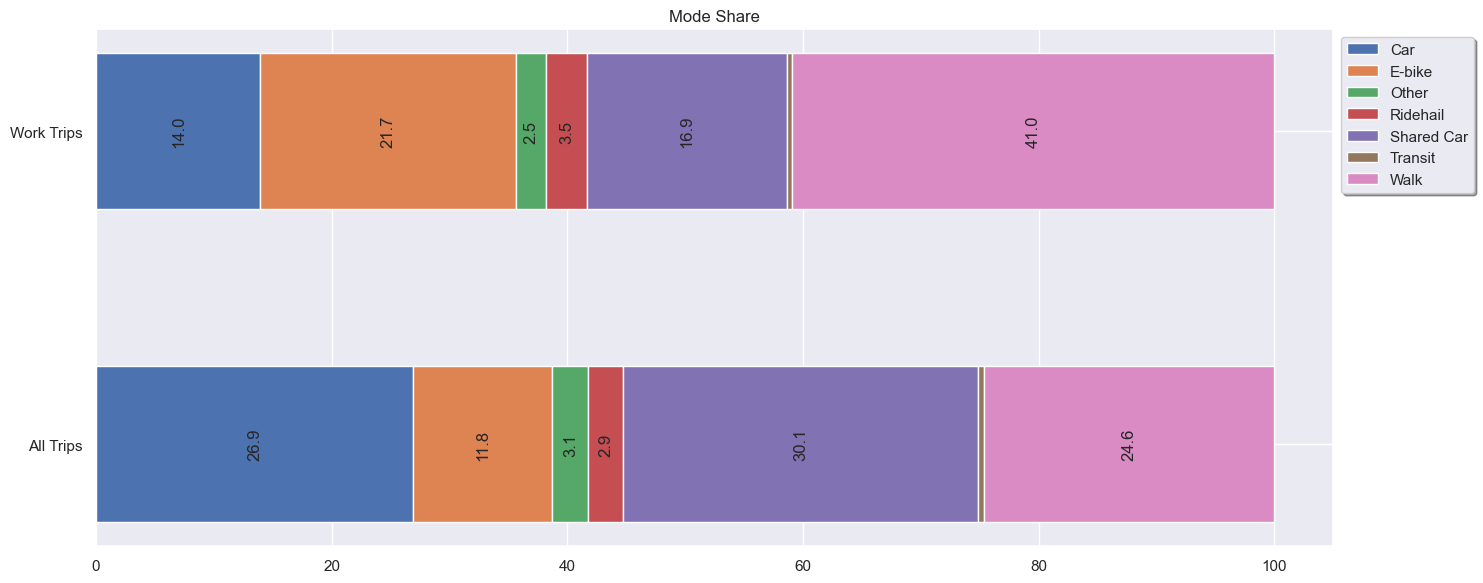

In [147]:
width = 0.5
fig, ax = plt.subplots(1,1, figsize=(15,6))
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='smart_commute']
fig_data_long = plot_data[plot_data['Dataset']=='smart_commute']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]

    #labels = mini['Trip Type']
    #vals = mini['Proportion']*100
    #vals_str = [round(v,1) if v>1 else '' for v in vals]
    #bar = ax.barh(labels, vals, width, left=running_total_mini, label=mode)
    #ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    #running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    #running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    vals_str = [round(v,1) if v>1 else '' for v in vals]
    bar = ax.barh(labels, vals, width, left=running_total_long, label=mode)
    ax.bar_label(bar, label_type='center', labels=vals_str, rotation=90)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

file_name='CanBikeCO_report_mode_share%s'
ax.set_title('Minipilot')
ax.set_title('Mode Share')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.25)
fig.tight_layout()
plt.show()
fig.savefig(file_name+".png", bbox_inches='tight')

C:\Users\dakcicek\Anaconda3\envs\emission\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



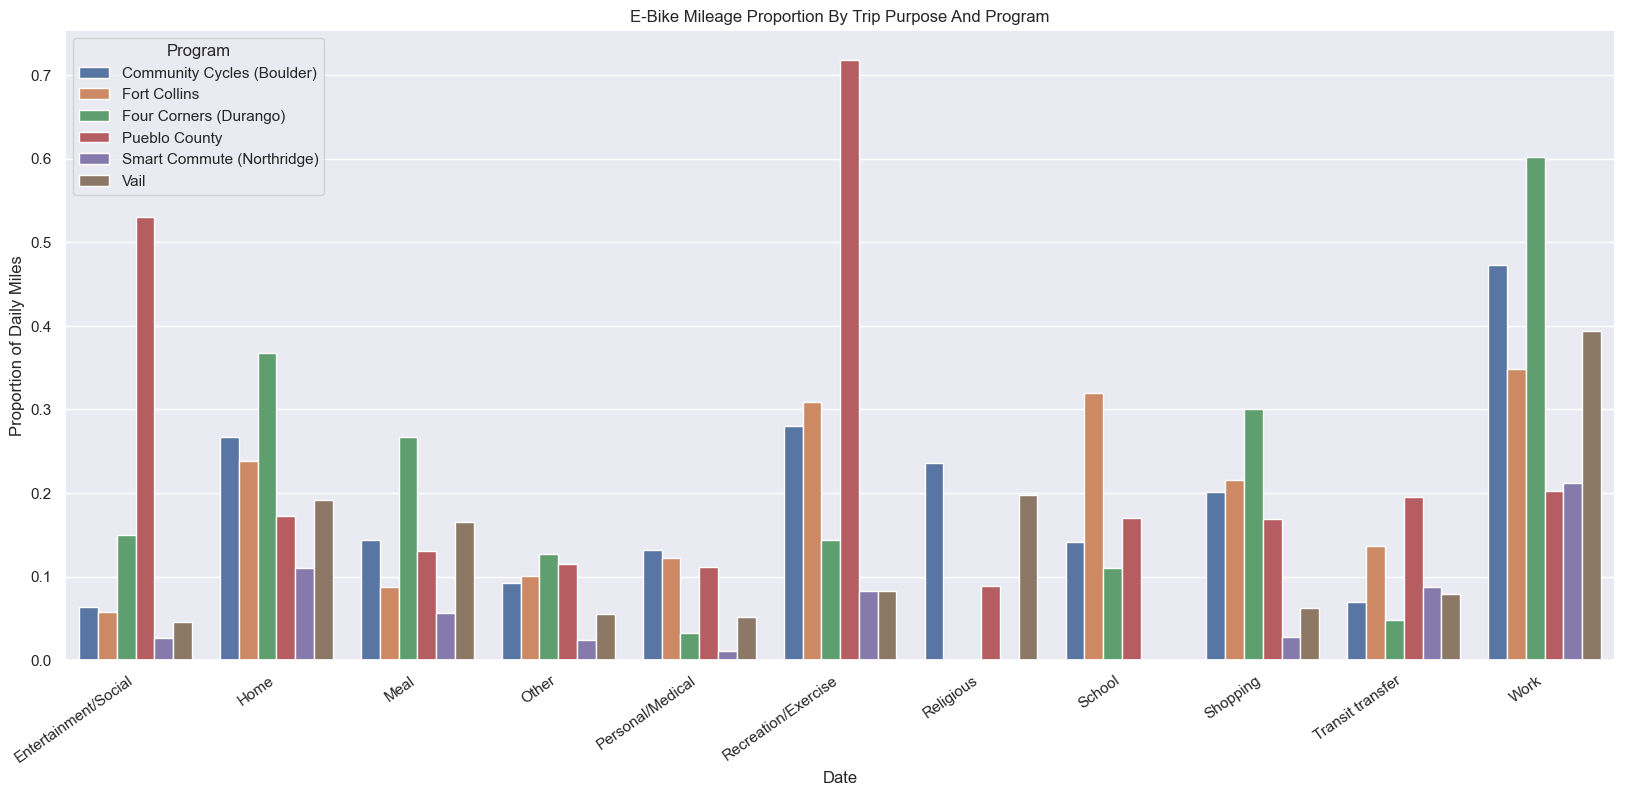

In [74]:
# What purpose ebike is used for by program
plot_data = data.copy()
#plot_data['month'] = plot_data.date_time.dt.month
#plot_data['month'] = plot_data['month'].replace([6,7,8,9,10,11,12,1,2,3,4,5], ['Summer','Summer','Summer','Fall','Fall','Fall','Winter','Winter','Winter','Spring','Spring','Spring'])
t1 = plot_data.groupby(['Program','Trip_purpose','Mode_confirm'], as_index=False).sum()[['Program','Trip_purpose','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['Program','Trip_purpose'], as_index=False).sum()[['Program','Trip_purpose','distance_miles']]
plot_data = t1.merge(t2, on=['Program','Trip_purpose'])
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
#plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

plot_title = 'E-Bike Mileage Proportion By Trip Purpose And Program'
ylab = 'Proportion of Daily Miles'
file_name = "CanBikeCO_report_ts_mileage_season%s"
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=plot_data, x='Trip_purpose', y='proportion', hue='Program', estimator=np.mean, ci=None).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

C:\Users\dakcicek\Anaconda3\envs\emission\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



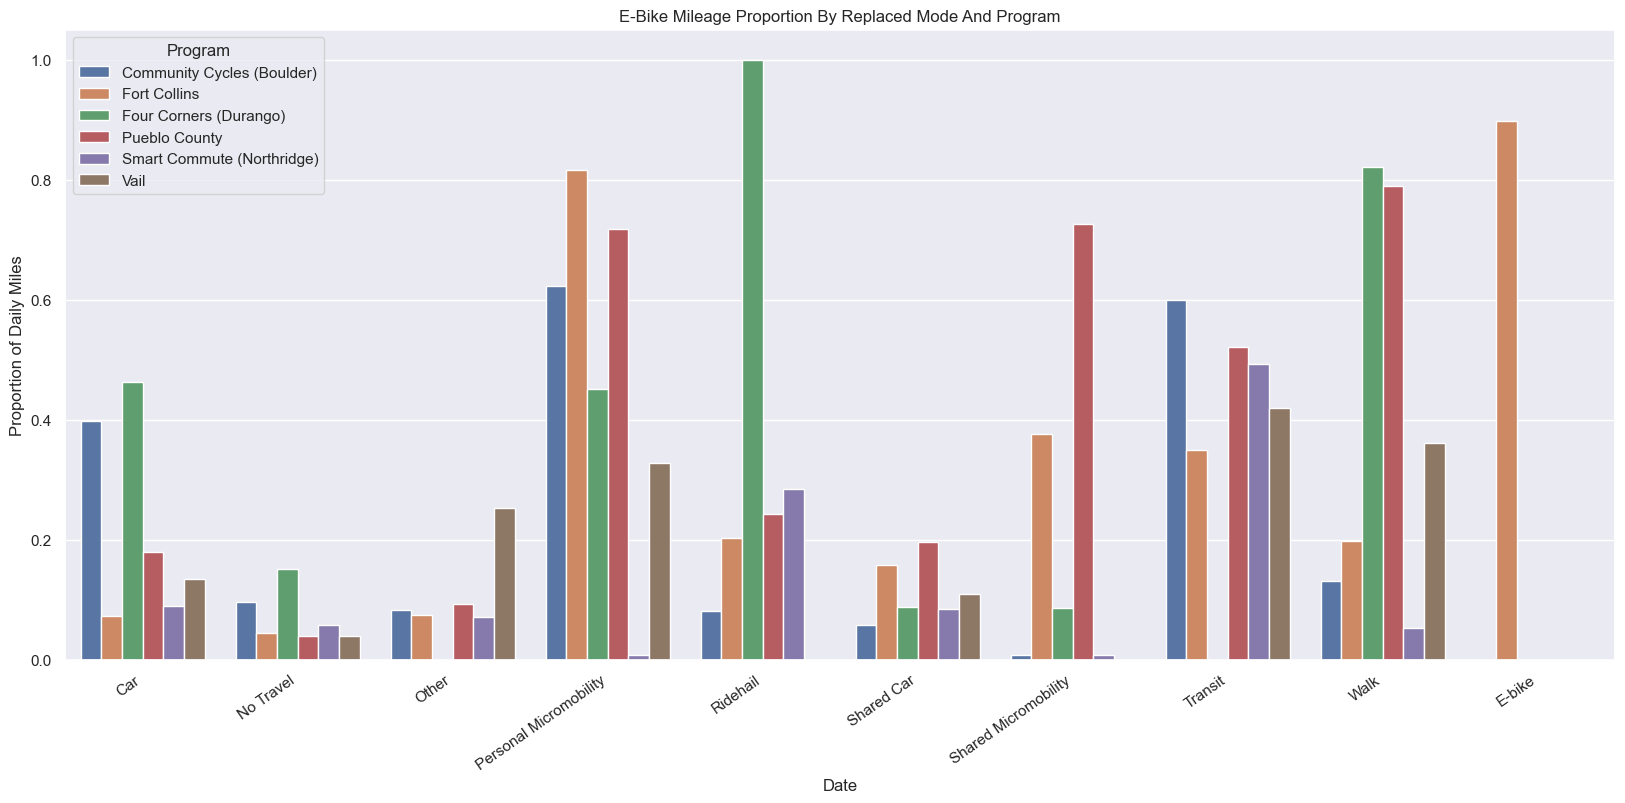

In [76]:
# What purpose ebike is used for by program
plot_data = data.copy()
#plot_data['month'] = plot_data.date_time.dt.month
#plot_data['month'] = plot_data['month'].replace([6,7,8,9,10,11,12,1,2,3,4,5], ['Summer','Summer','Summer','Fall','Fall','Fall','Winter','Winter','Winter','Spring','Spring','Spring'])
t1 = plot_data.groupby(['Program','Replaced_mode','Mode_confirm'], as_index=False).sum()[['Program','Replaced_mode','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['Program','Replaced_mode'], as_index=False).sum()[['Program','Replaced_mode','distance_miles']]
plot_data = t1.merge(t2, on=['Program','Replaced_mode'])
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
#plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

plot_title = 'E-Bike Mileage Proportion By Replaced Mode And Program'
ylab = 'Proportion of Daily Miles'
file_name = "CanBikeCO_report_ts_mileage_season%s"
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', hue='Program', estimator=np.mean, ci=None).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.figure.savefig(file_name+".png", bbox_inches='tight')

In [23]:
data_2=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips.csv")

C:\Users\dakcicek\Anaconda3\envs\tsdc_ops\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (65,72,75) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
data_2['Program'] = data_2['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

In [123]:
data['Program'] = data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

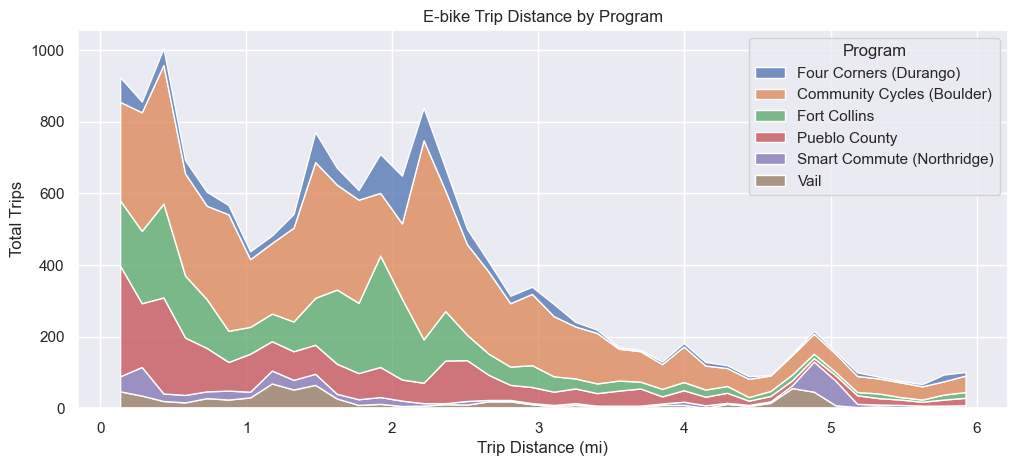

In [117]:
# E-bike Trip Distance by Program
plot_data = data.copy()
plot_data = plot_data[plot_data['distance_miles']<6]
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']

plot_title = 'E-bike Trip Distance by Program'
ylab = 'Total Trips'
file_name = "CanBikeCO_report_mode_share_distance_short%s"
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(ax=ax, data=plot_data, x='distance_miles', hue='Program', element='poly', multiple='stack').set(title=plot_title, ylabel=ylab, xlabel='Trip Distance (mi)')
plt.subplots_adjust(bottom=0.25)

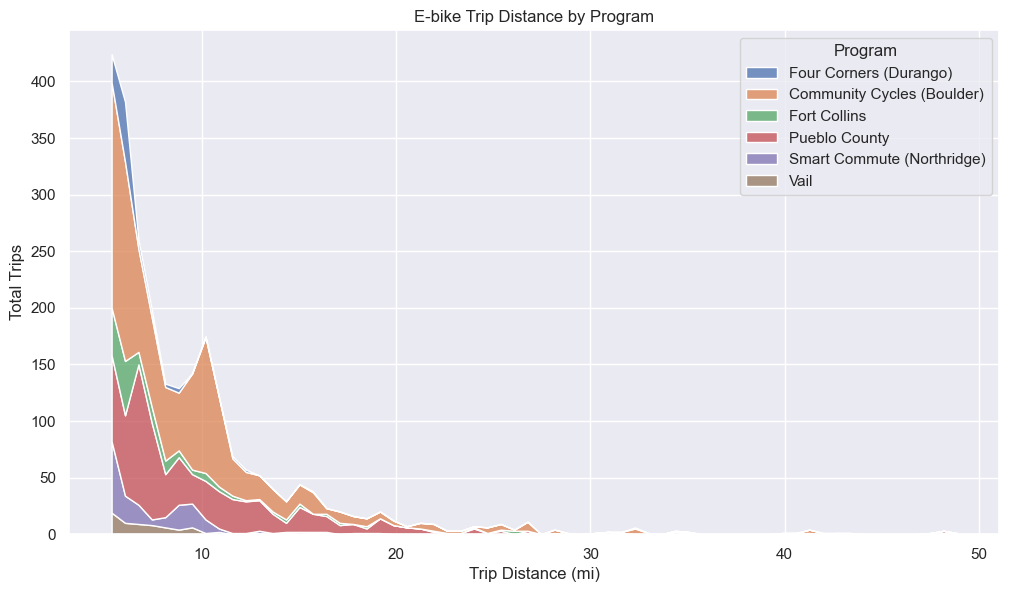

In [122]:
# E-bike Trip Distance by Program
plot_data = data.copy()
plot_data = plot_data[plot_data['distance_miles']>5]
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']

plot_title = 'E-bike Trip Distance by Program'
ylab = 'Total Trips'
file_name = "CanBikeCO_report_mode_share_distance_short%s"
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(ax=ax, data=plot_data, x='distance_miles', hue='Program', element='poly', multiple='stack').set(title=plot_title, ylabel=ylab, xlabel='Trip Distance (mi)')
plt.subplots_adjust(bottom=0.25)

# descriptive stats by program

In [71]:
data_2=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips.csv")

In [67]:
data_2['Program'] = data_2['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners (Durango)','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

In [5]:
#separating programs
four_corners = data_2[data_2.Program == "Four Corners (Durango)"]
community_cycles = data_2[data_2.Program == "Community Cycles (Boulder)"]
fort_collins = data_2[data_2.Program == "Fort Collins"]
pueblo = data_2[data_2.Program == "Pueblo County"]
smart_commute = data_2[data_2.Program == "Smart Commute (Northridge)"]
vail = data_2[data_2.Program == "Vail"]

In [73]:
plot_data_fourc = four_corners.copy()
plot_data_fourc = plot_data_fourc.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_fourc = plot_data_fourc[plot_data_fourc['GENDER'].isin(['Man','Woman'])]
plot_data_fourc = plot_data_fourc.groupby(['user_id'], as_index=False).nth(0)

plot_data_cc = community_cycles.copy()
plot_data_cc = plot_data_cc.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_cc = plot_data_cc[plot_data_cc['GENDER'].isin(['Man','Woman'])]
plot_data_cc = plot_data_cc.groupby(['user_id'], as_index=False).nth(0)

plot_data_fc = fort_collins.copy()
plot_data_fc = plot_data_fc.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_fc = plot_data_fc[plot_data_fc['GENDER'].isin(['Man','Woman'])]
plot_data_fc = plot_data_fc.groupby(['user_id'], as_index=False).nth(0)

plot_data_pue = pueblo.copy()
plot_data_pue = plot_data_pue.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_pue = plot_data_pue[plot_data_pue['GENDER'].isin(['Man','Woman'])]
plot_data_pue = plot_data_pue.groupby(['user_id'], as_index=False).nth(0)

plot_data_sc = smart_commute.copy()
plot_data_sc = plot_data_sc.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_sc = plot_data_sc[plot_data_sc['GENDER'].isin(['Man','Woman'])]
plot_data_sc = plot_data_sc.groupby(['user_id'], as_index=False).nth(0)

plot_data_vail = vail.copy()
plot_data_vail = plot_data_vail.groupby(['user_id']).nth(0)[['AGE','GENDER','VEH','HHINC']].dropna()
plot_data_vail = plot_data_vail[plot_data_vail['GENDER'].isin(['Man','Woman'])]
plot_data_vail = plot_data_vail.groupby(['user_id'], as_index=False).nth(0)

In [93]:
print(min(vail['start_ts']))
print(max(vail['start_ts']))

2021-09-22 01:30:32.538993597+00:00
2022-12-31 06:33:27.147785187+00:00


In [94]:
print(four_corners['user_id'].nunique())
print(community_cycles['user_id'].nunique())
print(fort_collins['user_id'].nunique())
print(pueblo['user_id'].nunique())
print(smart_commute['user_id'].nunique())
print(vail['user_id'].nunique())

10
42
22
29
11
8


In [95]:
print(len(four_corners))
print(len(community_cycles))
print(len(fort_collins))
print(len(pueblo))
print(len(smart_commute))
print(len(vail))

2240
25151
10656
12620
6515
4314


In [99]:
four_corners['Mode'].unique()

array(['E-bike', 'Shared Car', 'Walk', 'Personal Micromobility', 'Car',
       'Transit', 'Shared Micromobility', 'Other', 'Ridehail'],
      dtype=object)

In [110]:
print(len(four_corners[four_corners['Mode']=='E-bike']))
print(len(community_cycles[community_cycles['Mode']=='E-bike']))
print(len(fort_collins[fort_collins['Mode']=='E-bike']))
print(len(pueblo[pueblo['Mode']=='E-bike']))
print(len(smart_commute[smart_commute['Mode']=='E-bike']))
print(len(vail[vail['Mode']=='E-bike']))

34
642
47
119
35
231


In [6]:
fcc=four_corners[four_corners['Mode']=='E-bike']
cc=community_cycles[community_cycles['Mode']=='E-bike']
fc=fort_collins[fort_collins['Mode']=='E-bike']
p=pueblo[pueblo['Mode']=='E-bike']
sc=smart_commute[smart_commute['Mode']=='E-bike']
v=vail[vail['Mode']=='E-bike']

In [7]:
v['distance_miles'].describe()

count    773.000000
mean       2.615290
std        2.362854
min        0.069248
25%        1.083469
50%        1.547960
75%        4.464438
max       16.486467
Name: distance_miles, dtype: float64

In [9]:
#total miles for all modes
print(four_corners['distance_miles'].sum())
print(community_cycles['distance_miles'].sum())
print(fort_collins['distance_miles'].sum())
print(pueblo['distance_miles'].sum())
print(smart_commute['distance_miles'].sum())
print(vail['distance_miles'].sum())

9328.028052437
106411.830248965
31232.653599689
52394.334092555
26689.292364292
15850.031447741001


In [10]:
#total miles for just ebike trips
fcctotal = fcc['distance_miles'].sum()
cctotal = cc['distance_miles'].sum()
fctotal = fc['distance_miles'].sum()
ptotal = p['distance_miles'].sum()
sctotal = sc['distance_miles'].sum()
vtotal = v['distance_miles'].sum()
print(fcctotal)
print(cctotal)
print(fctotal)
print(ptotal)
print(sctotal)
print(vtotal)

2781.0096325980003
24034.754274712002
6486.052473971
11970.998137818
2694.569267918
2021.619369049


In [180]:
pueblo['Which best describes your primary job?'].value_counts()

Sales or service                                        3491
Manufacturing, construction, maintenance, or farming    2745
Janitorial                                              1467
Maintenance                                             1096
Maintenance                                             1068
Education                                                816
Professional, managerial, or technical                   482
Clerical or administrative support                       319
Teacher                                                  311
Medical                                                  211
CNA                                                      179
Restaurant manager                                       157
Co op laundry                                            126
Custodial                                                126
Cook                                                      26
Name: Which best describes your primary job?, dtype: int64

In [165]:
fort_collins['Which best describes your primary job?'].value_counts()

Sales or service                                        3956
Custodial                                               2435
Nurse                                                    652
Dining Services                                          555
Professional, managerial, or technical                   483
Custodial                                                379
Manufacturing, construction, maintenance, or farming     337
Security                                                 272
Food service                                             260
Csu custodian                                            211
Residential Dining Services                              124
Name: Which best describes your primary job?, dtype: int64

In [166]:
smart_commute['Which best describes your primary job?'].value_counts()

Sales or service                                        2815
education/early childhood                               1370
Education                                                878
Inbound cs                                               530
Custodial Maintanace                                     334
Amazon                                                   329
Custodian                                                175
Manufacturing, construction, maintenance, or farming      84
Name: Which best describes your primary job?, dtype: int64

In [167]:
vail['Which best describes your primary job?'].value_counts()

Professional, managerial, or technical                  2355
Clerical or administrative support                       984
Hockey rink                                              488
Sales or service                                         288
Manufacturing, construction, maintenance, or farming     199
Name: Which best describes your primary job?, dtype: int64

In [168]:
four_corners['Which best describes your primary job?'].value_counts()

Sales or service             1129
Food Service                  735
Pastry chef and line cook     196
Cooking                       180
Name: Which best describes your primary job?, dtype: int64

In [170]:
community_cycles['Which best describes your primary job?'].value_counts()

Professional, managerial, or technical                  9323
Sales or service                                        5516
Clerical or administrative support                      4155
Manufacturing, construction, maintenance, or farming    2033
Medical                                                 1142
Education                                                682
Education non-profit manager                             505
Education                                                501
Healthcare                                               389
Chef                                                     244
Accounting Technician                                    228
Caregiver/ Qmap                                          170
Caregiver                                                111
Health care                                              102
Medical field                                             50
Name: Which best describes your primary job?, dtype: int64

In [8]:
data['Trip_purpose'].unique()

array(['Home', 'Work', 'Other', 'Recreation/Exercise', 'Shopping',
       'Personal/Medical', 'Entertainment/Social', 'Meal', 'School',
       'Religious', 'Transit transfer'], dtype=object)

In [72]:
plot_data_3 = data_2.copy()
plot_data_3['induced']=np.where(data_2['Replaced_mode']== 'No Travel', 'Induced', 'Non-induced')

In [106]:
plot_data

,user_id,Replaced_mode,distance_miles_x,distance_miles_y,proportion
0,0154d714-3928-4c34-b865-e5a417cd48af,Car,578.273308,1088.948420,0.531038
1,0154d714-3928-4c34-b865-e5a417cd48af,Shared Car,510.675112,1088.948420,0.468962
2,03a395b4-d861-4757-bb84-32b4984559b0,Car,335.993267,355.144053,0.946076
3,03a395b4-d861-4757-bb84-32b4984559b0,No Travel,3.709356,355.144053,0.010445
4,03a395b4-d861-4757-bb84-32b4984559b0,Other,1.763991,355.144053,0.004967
...,...,...,...,...,...
603,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Personal Micromobility,16.094687,802.444881,0.020057
604,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Ridehail,47.112174,802.444881,0.058711
605,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Shared Car,34.423862,802.444881,0.042899
606,feb1d940-cd36-47d1-a101-580c2a3b3f8c,Transit,15.548157,802.444881,0.019376


[Text(0, 30, '0.34'),
 Text(0, 30, '0.22'),
 Text(0, 30, '0.11'),
 Text(0, 30, '0.10'),
 Text(0, 30, '0.09'),
 Text(0, 30, '0.08'),
 Text(0, 30, '0.03'),
 Text(0, 30, '0.02'),
 Text(0, 30, '0.00'),
 Text(0, 30, '0.00')]

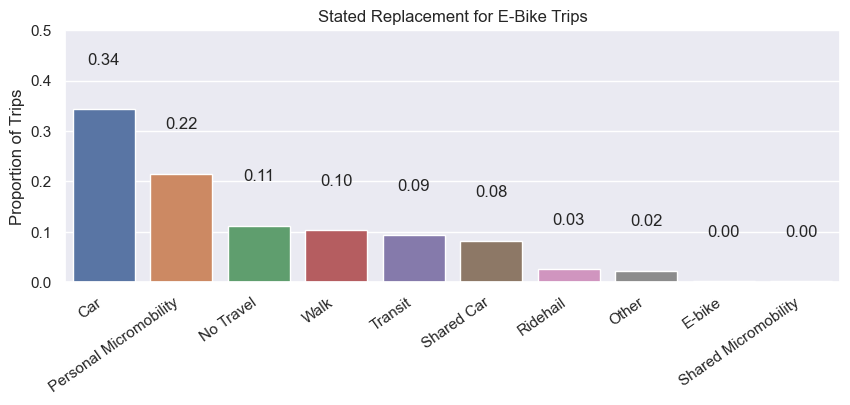

In [224]:
# Substitution rate of ebike trips
plot_data = data_2.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
t1 = plot_data.groupby(['Mode_confirm','Replaced_mode'], as_index=False).count()[['Mode_confirm','Replaced_mode','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
plot_data = t1.merge(t2, on='Mode_confirm')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)

data_order = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode
labels = plot_data.groupby(['Replaced_mode'], as_index=False).mean().sort_values('proportion', ascending=False).Replaced_mode

plot_title='Stated Replacement for E-Bike Trips'
ylab='Proportion of Trips'

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=plot_data, x='Replaced_mode', y='proportion', estimator=np.mean, order=data_order).set(title=plot_title,xlabel='',ylabel=ylab,ylim=(0,.5))
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=30)

In [188]:
plot_data_3 = data_2.copy()
plot_data_3['induced']=np.where(plot_data_3['Replaced_mode']=='No Travel', 'Induced', 'Non-induced')
t1 = plot_data_3[plot_data_3['Mode_confirm']=='E-bike']
t2 = t1.groupby(['induced'], as_index=False).count()[['induced','distance_miles']]

In [189]:
t2

,induced,distance_miles
0,Induced,1942
1,Non-induced,15406


<AxesSubplot:>

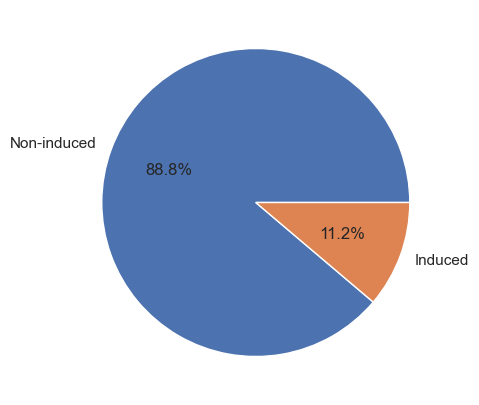

In [187]:
t1.induced.value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(5, 5), label='')

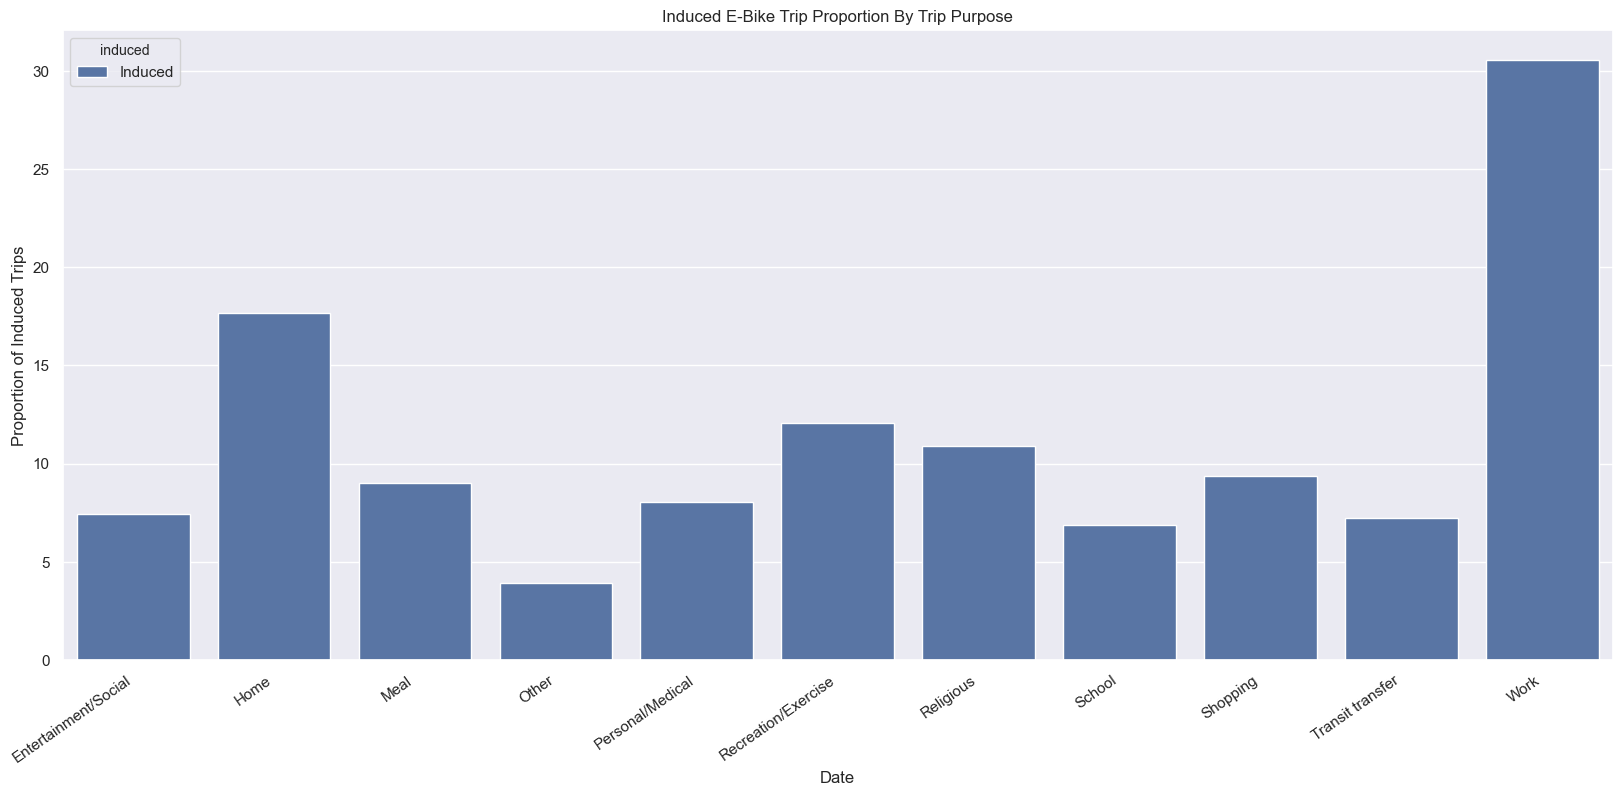

In [180]:
# What purpose ebike is used for by program
plot_data = plot_data_3.copy()
t1 = plot_data.groupby(['induced','Trip_purpose','Mode_confirm'], as_index=False).count()[['induced','Trip_purpose','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['induced','Trip_purpose'], as_index=False).count()[['induced','Trip_purpose','distance_miles']]
plot_data = t1.merge(t2, on=['induced','Trip_purpose'])
plot_data['proportion'] = (plot_data['distance_miles_x'] / plot_data['distance_miles_y'])*100
plot_data['proportion'].fillna(0, inplace=True)
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data[plot_data['induced']=='Induced']
#plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Northridge)','Vail'])

plot_title = 'Induced E-Bike Trip Proportion By Trip Purpose'
ylab = 'Proportion of Induced Trips'
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=plot_data, x='Trip_purpose', y='proportion', hue='induced',estimator=np.mean, ci=None).set(title=plot_title, xlabel='Date', ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)


In [37]:
plot_data

,induced,Trip_purpose,Mode_confirm,distance_miles_x,distance_miles_y,proportion
1,Induced,Entertainment/Social,E-bike,160.787460,7468.818052,2.152783
9,Induced,Home,E-bike,1698.737587,16830.476208,10.093224
18,Induced,Meal,E-bike,143.413234,3238.673707,4.428147
27,Induced,Other,E-bike,328.780811,16626.476806,1.977453
35,Induced,Personal/Medical,E-bike,85.952036,2842.130018,3.024212
41,Induced,Recreation/Exercise,E-bike,1053.834771,7222.013250,14.591981
50,Induced,Religious,E-bike,10.978983,247.391682,4.437895
55,Induced,School,E-bike,50.506401,933.706635,5.409237
61,Induced,Shopping,E-bike,515.912077,6064.649360,8.506874
69,Induced,Transit transfer,E-bike,16.854401,845.673962,1.993014


In [77]:
data=pd.read_csv("C:\\Users\\dakcicek\\Documents\\GitHub\\ceo_analysis\\viz_scripts\\filtered_merged_trips.csv")

C:\Users\dakcicek\Anaconda3\envs\emission\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (65,72,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
data['duration'].describe()

count    61496.000000
mean        24.145146
std         30.691071
min          0.000068
25%          9.173613
50%         15.289998
75%         28.071609
max        479.495935
Name: duration, dtype: float64

In [58]:
data['distance_miles'].describe()

count    61496.000000
mean         3.933690
std          5.991457
min          0.062013
25%          0.721590
50%          1.983511
75%          4.342240
max         49.929320
Name: distance_miles, dtype: float64

In [63]:
four_corners['VEH_num'].describe()

count    2240.000000
mean        1.385714
std         0.597278
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: VEH_num, dtype: float64

In [65]:
pueblo['VEH_num'].describe()

count    12620.000000
mean         1.873930
std          1.051507
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: VEH_num, dtype: float64

In [66]:
vail['VEH_num'].describe()

count    4314.000000
mean        1.604080
std         0.890448
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: VEH_num, dtype: float64

In [67]:
smart_commute['VEH_num'].describe()

count    6515.000000
mean        2.103454
std         0.963907
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: VEH_num, dtype: float64

In [68]:
fort_collins['VEH_num'].describe()

count    10656.000000
mean         1.187312
std          0.623648
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: VEH_num, dtype: float64

In [69]:
community_cycles['VEH_num'].describe()

count    25151.000000
mean         1.626138
std          0.798099
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: VEH_num, dtype: float64

# Energy Impact

In [46]:
mode_of_interest = "E-bike"

In [47]:
data_eb = data_2.query(f"Mode == '{mode_of_interest}'") if "Mode" in data_2.columns else data_2

In [48]:
data_eb

,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,WORKERS,is_ebike,HHINC_NUM,PINC,Mode,PINC_NUM,VEH_num,DRIVERS,DRIVERS_num,veh_per_driver
0,DwellSegmentationTimeFilter,1629871457,2021-08-25T00:04:16.898000-06:00,"{'type': 'Point', 'coordinates': [-107.8611981...",6125ee087a779613738ad16c,2021-08-25 05:55:19.566900969+00:00,2021-08-24T23:55:19.566901-06:00,"{'type': 'Point', 'coordinates': [-107.8805606...",8.955518,2562.681518,...,2,E-Bike Trips,12500,$0-9,E-bike,6250.0,1,1,<bound method Series.replace of 7 1\n8 ...,1.0
1,DwellSegmentationTimeFilter,1629900322,2021-08-25T08:05:21.637000-06:00,"{'type': 'Point', 'coordinates': [-107.8810375...",61265e8906e4c6c000ae237a,2021-08-25 13:58:47+00:00,2021-08-25T07:58:47-06:00,"{'type': 'Point', 'coordinates': [-107.8664569...",6.577283,1743.571028,...,2,E-Bike Trips,12500,$0-9,E-bike,6250.0,1,1,<bound method Series.replace of 7 1\n8 ...,1.0
2,DwellSegmentationTimeFilter,1629928946,2021-08-25T16:02:26.349000-06:00,"{'type': 'Point', 'coordinates': [-107.8805793...",6126cefe5e9a33350c3addfa,2021-08-25 20:41:40.855815172+00:00,2021-08-25T14:41:40.855815-06:00,"{'type': 'Point', 'coordinates': [-107.8810375...",80.758220,488.472968,...,2,E-Bike Trips,12500,$0-9,E-bike,6250.0,1,1,<bound method Series.replace of 7 1\n8 ...,1.0
3,DwellSegmentationTimeFilter,1629932515,2021-08-25T17:01:55-06:00,"{'type': 'Point', 'coordinates': [-107.8812319...",6126dd19626dbb8489f593a3,2021-08-25 22:04:20.041023493+00:00,2021-08-25T16:04:20.041024-06:00,"{'type': 'Point', 'coordinates': [-107.8805793...",57.582650,217.642664,...,2,E-Bike Trips,12500,$0-9,E-bike,6250.0,1,1,<bound method Series.replace of 7 1\n8 ...,1.0
4,DwellSegmentationTimeFilter,1629934536,2021-08-25T17:35:36.408000-06:00,"{'type': 'Point', 'coordinates': [-107.8611821...",6126dd19626dbb8489f593a5,2021-08-25 23:27:29.197175264+00:00,2021-08-25T17:27:29.197175-06:00,"{'type': 'Point', 'coordinates': [-107.8812319...",8.120180,2406.394251,...,2,E-Bike Trips,12500,$0-9,E-bike,6250.0,1,1,<bound method Series.replace of 7 1\n8 ...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61490,DwellSegmentationDistFilter,1667414389,2022-11-02T12:39:48.999104-06:00,"{'type': 'Point', 'coordinates': [-106.3739525...",6362c7005d867f05e387ccfa,2022-11-02 18:14:03.438604593+00:00,2022-11-02T12:14:03.438605-06:00,"{'type': 'Point', 'coordinates': [-106.3841716...",25.759342,1255.506665,...,1,E-Bike Trips,37500,$30-39,E-bike,37500.0,0,1,<bound method Series.replace of 7 1\n8 ...,0.0
61491,DwellSegmentationDistFilter,1667416514,2022-11-02T13:15:13.623879-06:00,"{'type': 'Point', 'coordinates': [-106.3822104...",6362c7005d867f05e387ccfc,2022-11-02 18:56:53.295839310+00:00,2022-11-02T12:56:53.295839-06:00,"{'type': 'Point', 'coordinates': [-106.3739525...",18.338801,1406.704065,...,1,E-Bike Trips,37500,$30-39,E-bike,37500.0,0,1,<bound method Series.replace of 7 1\n8 ...,0.0
61493,DwellSegmentationDistFilter,1667448145,2022-11-02T22:02:25.142903-06:00,"{'type': 'Point', 'coordinates': [-106.3806151...",63634568b80d9c8871fde719,2022-11-03 03:55:09.275525808+00:00,2022-11-02T21:55:09.275526-06:00,"{'type': 'Point', 'coordinates': [-106.3828356...",7.264456,841.375442,...,1,E-Bike Trips,37500,$30-39,E-bike,37500.0,0,1,<bound method Series.replace of 7 1\n8 ...,0.0
61494,DwellSegmentationDistFilter,1667503957,2022-11-03T13:32:36.860492-06:00,"{'type': 'Point', 'coordinates': [-106.3824186...",636418a14e0e9621344706c0,2022-11-03 19:10:35.899986744+00:00,2022-11-03T13:10:35.899987-06:00,"{'type': 'Point', 'coordinates': [-106.3806151...",22.016008,1069.953308,...,1,E-Bike Trips,37500,$30-39,E-bike,37500.0,0,1,<bound method Series.replace of 7 1\n8 ...,0.0


In [221]:
# Emissions analysis
z = data_eb.groupby('Replaced_mode', as_index=False).sum('distance_miles')[['Replaced_mode','distance_miles']]

co2_combo_factors = [5170*157.2*.000001,
                    .022*1166*.001,
                    0,
                    0,
                    0,
                    7214*157.2*.000001,
                    2585*157.2*.000001,
                    .027*1166*.001,
                    4560*161.3*.000001,
                    0]
co2_ebike_factor = .022*1166*.001
z['co2_impact_factor'] = [x-co2_ebike_factor for x in co2_combo_factors]
z['CO2_Impact(lb)'] = z['distance_miles']*z['co2_impact_factor'] # Reduction=positive
metric_ton_co2_reduction = sum(z['CO2_Impact(lb)'])/2204
unique_users = len(pd.unique(data_eb['user_id']))
print(f"Net reduction: {metric_ton_co2_reduction} metric tons over {unique_users} users.")
print(f"Net program costs: {2400*unique_users}")
print(f"Program $/mtCO2: {(2400*unique_users) / (metric_ton_co2_reduction)}")

Net reduction: 9.337279641632389 metric tons over 120 users.
Net program costs: 288000
Program $/mtCO2: 30844.101392860335


In [64]:
def CO2_impact_lb(df,distance):
    if 'Mode_confirm_lb_CO2' not in df.columns:
        print("Mode confirm footprint not found, computing before impact")
        df = CO2_footprint_lb(df, distance, "Mode_confirm")
    df = CO2_footprint_lb(df, distance, "Replaced_mode")
    df['CO2_Impact(lb)']  = round((df['Replaced_mode_lb_CO2'] - df['Mode_confirm_lb_CO2']),3)
    return df

In [219]:
year = None
month = None
program = "default"
study_type = "program"
mode_of_interest = "e-bike"
include_test_users = False

In [ ]:
debug_df = pd.DataFrame.from_dict({
            "year": year,
            "month": month,
            "Registered_participants": len(get_participant_uuids(program, include_test_users)),
            "Participants_with_at_least_one_trip": unique_users(participant_ct_df),
            "Participant_with_at_least_one_labeled_trip": unique_users(labeled_ct),
            "Trips_with_at_least_one_label": len(labeled_ct),
            "Trips_with_mode_confirm_label": trip_label_count("Mode_confirm", expanded_ct),
            "Trips_with_trip_purpose_label": trip_label_count("Trip_purpose", expanded_ct)
            },
        orient='index', columns=["value"])

[Errno 2] No such file or directory: '/plots/sketch_energy_impact_e-bike%s.png'


NameError: name 'debug_df' is not defined

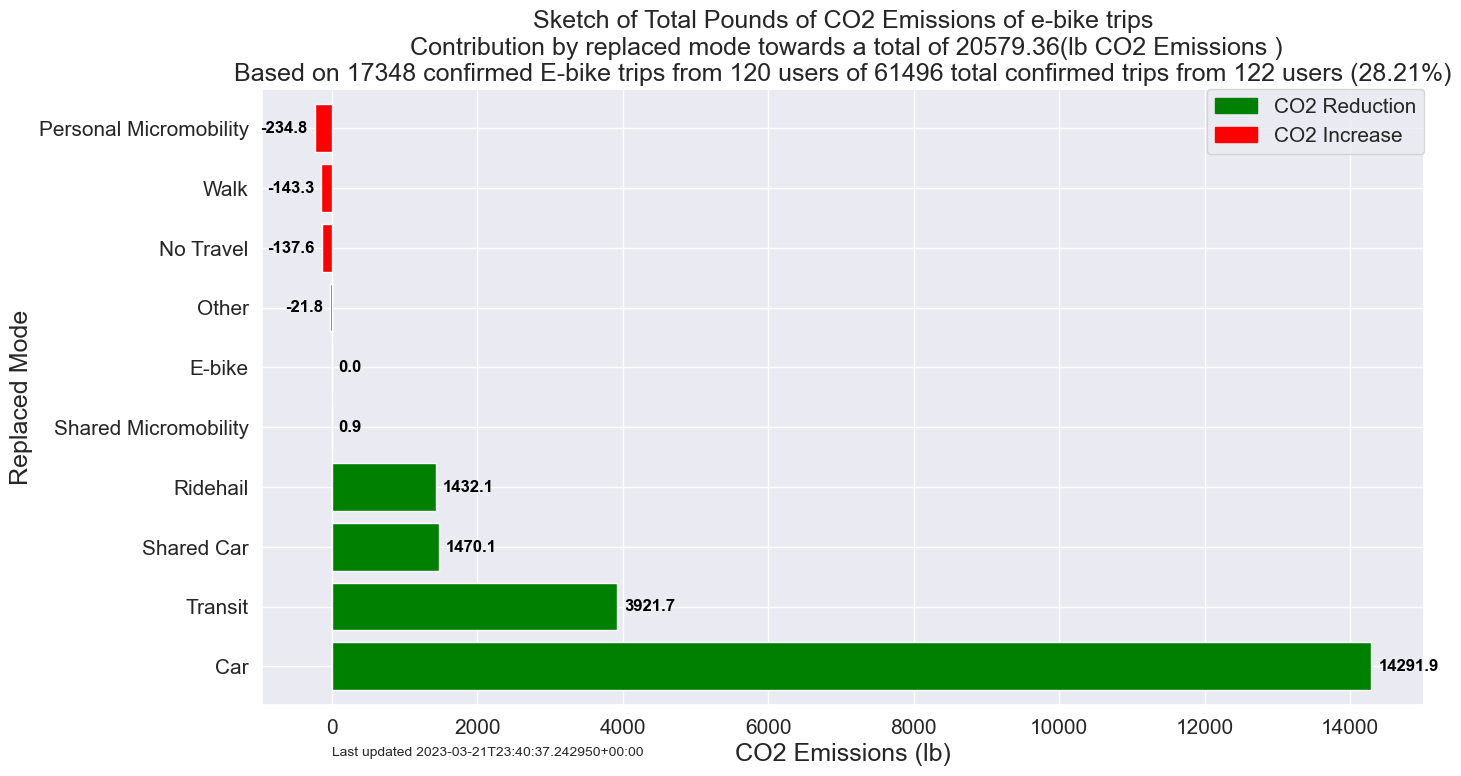

In [223]:
plot_title_no_quality=f"Sketch of Total Pounds of CO2 Emissions of {mode_of_interest} trips"
file_name =f'sketch_energy_impact_{mode_of_interest}%s'
quality_text=f"Based on 17348 confirmed E-bike trips from 120 users of 61496 total confirmed trips from 122 users (28.21%)"

try:
    ebco2=z.groupby('Replaced_mode').agg({'CO2_Impact(lb)': ['sum', 'mean']},)
    ebco2.columns = ['total_lb_CO2_emissions', 'average_lb_CO2_emission']
    ebco2 = ebco2.reset_index()
    ebco2 = ebco2.sort_values(by=['total_lb_CO2_emissions'], ascending=False)
    ebco2['boolean'] = ebco2['total_lb_CO2_emissions'] > 0
    net_CO2_emissions = round(sum(ebco2['total_lb_CO2_emissions']), 2)

    x = ebco2['total_lb_CO2_emissions']
    y = ebco2['Replaced_mode']
    color = ebco2['boolean']

    fig_size=(15,10)
    plot_title= plot_title_no_quality+f"\n Contribution by replaced mode towards a total of {net_CO2_emissions}(lb CO2 Emissions )\n"+quality_text
    CO2_impact(x,y,color,plot_title,file_name)
    alt_text = store_alt_text_bar(pd.DataFrame(x.values,y), file_name, plot_title)
except Exception as e:
    print(e)
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)